In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt
import stan_helpers as sh
import importlib as imp
import seaborn.objects as so

# Load and massage Data

In [2]:
dgrpall=pd.read_csv('DGRPsummerall.csv')
dgrpall

BatchNumber  TrayNumber  FlyID  LineNumber  Sex  n_Week1Day1  \
0               1           1      1          45    1           54   
1               1           1      2          45    1          873   
2               1           1      3          45    1          196   
3               1           1      4          45    1            3   
4               1           1      5          45    1            0   
...           ...         ...    ...         ...  ...          ...   
1243            5           2     92         819    0          343   
1244            5           2     93         819    0          281   
1245            5           2     94         819    0          126   
1246            5           2     95         819    0          472   
1247            5           2     96         819    0           39   

      rBias_Week1Day1  n_Week1Day2  rBias_Week1Day2  n_Week1Day3  ...  \
0            0.509434        610.0         0.316913         34.0  ...   
1            0.321101        217.0         0.601852          3.0  ...   
2            0.635897        686.0         0.400000         15.0  ...   
3            0.500000        257.0         0.378906         46.0  ...   
4                 NaN        726.0         0.388966          1.0  ...   
...               ...          ...              ...          ...  ...   
1243         0.654971        158.0         0.477707          NaN  ...   
1244         0.435714         31.0         0.566667          NaN  ...   
1245         0.328000        395.0         0.428934          NaN  ...   
1246         0.585987        363.0         0.651934          NaN  ...   
1247         0.552632        133.0         0.560606          NaN  ...   

      n_Week2Day2  rBias_Week2Day2  n_Week2Day3  rBias_Week2Day3  n_Week3Day1  \
0           774.0         0.495472        387.0         0.383420        741.0   
1           452.0         0.308204        197.0         0.535714         -1.0   
2            -1.0              NaN         -1.0              NaN         -1.0   
3            -1.0              NaN         -1.0              NaN         -1.0   
4            -1.0              NaN         -1.0              NaN         -1.0   
...           ...              ...          ...              ...          ...   
1243        326.0         0.646154        212.0         0.545024          NaN   
1244        209.0         0.389423          0.0              NaN          NaN   
1245        562.0         0.556150        328.0         0.425076          NaN   
1246        243.0         0.504132         -1.0              NaN          NaN   
1247        356.0         0.628169        231.0         0.500000          NaN   

      rBias_Week3Day1  n_Week3Day2  rBias_Week3Day2  n_Week3Day3  \
0            0.535135          NaN              NaN         -1.0   
1                 NaN          NaN              NaN         -1.0   
2                 NaN          NaN              NaN         -1.0   
3                 NaN          NaN              NaN         -1.0   
4                 NaN          NaN              NaN         -1.0   
...               ...          ...              ...          ...   
1243              NaN          NaN              NaN          NaN   
1244              NaN          NaN              NaN          NaN   
1245              NaN          NaN              NaN          NaN   
1246              NaN          NaN              NaN          NaN   
1247              NaN          NaN              NaN          NaN   

      rBias_Week3Day3  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1243              NaN  
1244              NaN  
1245              NaN  
1246              NaN  
1247              NaN  

[1248 rows x 23 columns]

In [3]:
skt=dgrpall[dgrpall['LineNumber']!=0]
skt=skt.reset_index(drop=True).reset_index()
skt=skt.rename(columns={'index':"uID"})
skt

uID  BatchNumber  TrayNumber  FlyID  LineNumber  Sex  n_Week1Day1  \
0        0            1           1      1          45    1           54   
1        1            1           1      2          45    1          873   
2        2            1           1      3          45    1          196   
3        3            1           1      4          45    1            3   
4        4            1           1      5          45    1            0   
...    ...          ...         ...    ...         ...  ...          ...   
1188  1188            5           2     92         819    0          343   
1189  1189            5           2     93         819    0          281   
1190  1190            5           2     94         819    0          126   
1191  1191            5           2     95         819    0          472   
1192  1192            5           2     96         819    0           39   

      rBias_Week1Day1  n_Week1Day2  rBias_Week1Day2  ...  n_Week2Day2  \
0            0.509434        610.0         0.316913  ...        774.0   
1            0.321101        217.0         0.601852  ...        452.0   
2            0.635897        686.0         0.400000  ...         -1.0   
3            0.500000        257.0         0.378906  ...         -1.0   
4                 NaN        726.0         0.388966  ...         -1.0   
...               ...          ...              ...  ...          ...   
1188         0.654971        158.0         0.477707  ...        326.0   
1189         0.435714         31.0         0.566667  ...        209.0   
1190         0.328000        395.0         0.428934  ...        562.0   
1191         0.585987        363.0         0.651934  ...        243.0   
1192         0.552632        133.0         0.560606  ...        356.0   

      rBias_Week2Day2  n_Week2Day3  rBias_Week2Day3  n_Week3Day1  \
0            0.495472        387.0         0.383420        741.0   
1            0.308204        197.0         0.535714         -1.0   
2                 NaN         -1.0              NaN         -1.0   
3                 NaN         -1.0              NaN         -1.0   
4                 NaN         -1.0              NaN         -1.0   
...               ...          ...              ...          ...   
1188         0.646154        212.0         0.545024          NaN   
1189         0.389423          0.0              NaN          NaN   
1190         0.556150        328.0         0.425076          NaN   
1191         0.504132         -1.0              NaN          NaN   
1192         0.628169        231.0         0.500000          NaN   

      rBias_Week3Day1  n_Week3Day2  rBias_Week3Day2  n_Week3Day3  \
0            0.535135          NaN              NaN         -1.0   
1                 NaN          NaN              NaN         -1.0   
2                 NaN          NaN              NaN         -1.0   
3                 NaN          NaN              NaN         -1.0   
4                 NaN          NaN              NaN         -1.0   
...               ...          ...              ...          ...   
1188              NaN          NaN              NaN          NaN   
1189              NaN          NaN              NaN          NaN   
1190              NaN          NaN              NaN          NaN   
1191              NaN          NaN              NaN          NaN   
1192              NaN          NaN              NaN          NaN   

      rBias_Week3Day3  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1188              NaN  
1189              NaN  
1190              NaN  
1191              NaN  
1192              NaN  

[1193 rows x 24 columns]

In [4]:
skt_melted=skt.iloc[:,0:23].melt(id_vars=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID"])
skt_melted['Day']=pd.Series(np.zeros(skt_melted.shape[0]))
skt_melted['Variable']=pd.Series(np.zeros(skt_melted.shape[0]))
dayreg=re.compile('Day([0-9]+)')
weekreg=re.compile('Week([0-9]+)')
# varreg=
for row in np.arange(skt_melted.shape[0]):
  # print(row)
  day=dayreg.search(skt_melted.iloc[row]['variable']).group(1)
  week=weekreg.search(skt_melted.iloc[row]['variable']).group(1)
  skt_melted.iloc[row, 8]=int(int(day)+(int(week)-1)*7)-1
  skt_melted.iloc[row,9]=str(skt_melted.iloc[row,6])[0]
  # print(day.group(1))
skt_melted=skt_melted.drop(columns=['variable'])
skt_unmelted=skt_melted.pivot(index=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID", "Day"], columns="Variable", values="value")
skt_unmelted['x']=(skt_unmelted['n']-1)*skt_unmelted['r']
skt_unmelted=skt_unmelted.reset_index()
skt_unmelted_obs=skt_unmelted.dropna(axis="index")
skt_unmelted_obs

Variable  BatchNumber  TrayNumber  FlyID  LineNumber  Sex   uID  Day      n  \
0                   1           1      1          45    1     0  0.0   54.0   
1                   1           1      1          45    1     0  1.0  610.0   
2                   1           1      1          45    1     0  2.0   34.0   
3                   1           1      1          45    1     0  7.0  544.0   
4                   1           1      1          45    1     0  8.0  774.0   
...               ...         ...    ...         ...  ...   ...  ...    ...   
10728               5           2     96         819    0  1192  0.0   39.0   
10729               5           2     96         819    0  1192  1.0  133.0   
10731               5           2     96         819    0  1192  7.0  438.0   
10732               5           2     96         819    0  1192  8.0  356.0   
10733               5           2     96         819    0  1192  9.0  231.0   

Variable         r      x  
0         0.509434   27.0  
1         0.316913  193.0  
2         0.575758   19.0  
3         0.364641  198.0  
4         0.495472  383.0  
...            ...    ...  
10728     0.552632   21.0  
10729     0.560606   74.0  
10731     0.519451  227.0  
10732     0.628169  223.0  
10733     0.500000  115.0  

[5340 rows x 10 columns]

In [5]:
skt_unmelted_mis=skt_unmelted[skt_unmelted.isna().any(axis=1)]
skt_unmelted_mis

Variable  BatchNumber  TrayNumber  FlyID  LineNumber  Sex   uID   Day    n  \
7                   1           1      1          45    1     0  15.0  NaN   
8                   1           1      1          45    1     0  16.0 -1.0   
15                  1           1      2          45    1     1  14.0 -1.0   
16                  1           1      2          45    1     1  15.0  NaN   
17                  1           1      2          45    1     1  16.0 -1.0   
...               ...         ...    ...         ...  ...   ...   ...  ...   
10727               5           2     95         819    0  1191  16.0  NaN   
10730               5           2     96         819    0  1192   2.0  NaN   
10734               5           2     96         819    0  1192  14.0  NaN   
10735               5           2     96         819    0  1192  15.0  NaN   
10736               5           2     96         819    0  1192  16.0  NaN   

Variable   r   x  
7        NaN NaN  
8        NaN NaN  
15       NaN NaN  
16       NaN NaN  
17       NaN NaN  
...       ..  ..  
10727    NaN NaN  
10730    NaN NaN  
10734    NaN NaN  
10735    NaN NaN  
10736    NaN NaN  

[5397 rows x 10 columns]

In [6]:
skt_unmelted_mis_b=skt_unmelted_mis
dummyrow=skt_unmelted_mis.iloc[0,:]
dummyrow
actualdays=np.unique(skt_unmelted_obs["Day"])
fullrange=np.arange(0,np.max(actualdays))
for ii, i in enumerate(actualdays):
  for jj, j in enumerate(fullrange):
    if j==i:
      # print(j)
      # print(i)
      fullrange[jj]=np.nan


missingdays=np.array(pd.Series(fullrange).dropna(), dtype=int)

np.unique(skt_unmelted_obs["Day"])
for i in range(skt.shape[0]):
  dummyrownew=dummyrow.copy()
  dummyrownew.loc['uID']=int(i)
  for j in missingdays:
    dummyrownew.loc['Day']=int(j)
    skt_unmelted_mis_b=pd.concat([skt_unmelted_mis_b, pd.DataFrame(dummyrownew).T])
    # skt_unmelted_mis_b.append(dummyrow)

In [7]:
dgrp_data_sk_alld={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}

In [8]:
dgrp_data_sk_alld

{'N': 1193,
 'S': 12,
 'T': 17,
 's': array([1, 1, 1, ..., 9, 9, 9], dtype=int8),
 'fly_i_obs': array([   1,    1,    1, ..., 1193, 1193, 1193]),
 'time_i_obs': array([ 1,  2,  3, ...,  8,  9, 10]),
 't_obs': 5340,
 'x_obs': array([ 27, 193,  19, ..., 227, 222, 115]),
 'n_obs': array([ 54, 610,  34, ..., 438, 356, 231]),
 'fly_i_mis': array([   1,    1,    2, ..., 1193, 1193, 1193]),
 'time_i_mis': array([16, 17, 15, ..., 12, 13, 14]),
 't_mis': 14941}

# Quick and dirty SD version

In [9]:
skt_unmelted

Variable  BatchNumber  TrayNumber  FlyID  LineNumber  Sex   uID   Day      n  \
0                   1           1      1          45    1     0   0.0   54.0   
1                   1           1      1          45    1     0   1.0  610.0   
2                   1           1      1          45    1     0   2.0   34.0   
3                   1           1      1          45    1     0   7.0  544.0   
4                   1           1      1          45    1     0   8.0  774.0   
...               ...         ...    ...         ...  ...   ...   ...    ...   
10732               5           2     96         819    0  1192   8.0  356.0   
10733               5           2     96         819    0  1192   9.0  231.0   
10734               5           2     96         819    0  1192  14.0    NaN   
10735               5           2     96         819    0  1192  15.0    NaN   
10736               5           2     96         819    0  1192  16.0    NaN   

Variable         r      x  
0         0.509434   27.0  
1         0.316913  193.0  
2         0.575758   19.0  
3         0.364641  198.0  
4         0.495472  383.0  
...            ...    ...  
10732     0.628169  223.0  
10733     0.500000  115.0  
10734          NaN    NaN  
10735          NaN    NaN  
10736          NaN    NaN  

[10737 rows x 10 columns]

In [10]:
r_std=skt_unmelted.groupby(["LineNumber","Day"]).std()['r']
rstd=r_std.reset_index()
rstd["LineNumber"]=pd.Categorical(rstd["LineNumber"])

In [11]:
rstd

LineNumber   Day         r
0          45   0.0  0.138260
1          45   1.0  0.117557
2          45   2.0  0.112264
3          45   7.0  0.121423
4          45   8.0  0.162250
..        ...   ...       ...
85        907   8.0  0.126441
86        907   9.0       NaN
87        907  14.0  0.140280
88        907  15.0  0.199915
89        907  16.0       NaN

[90 rows x 3 columns]

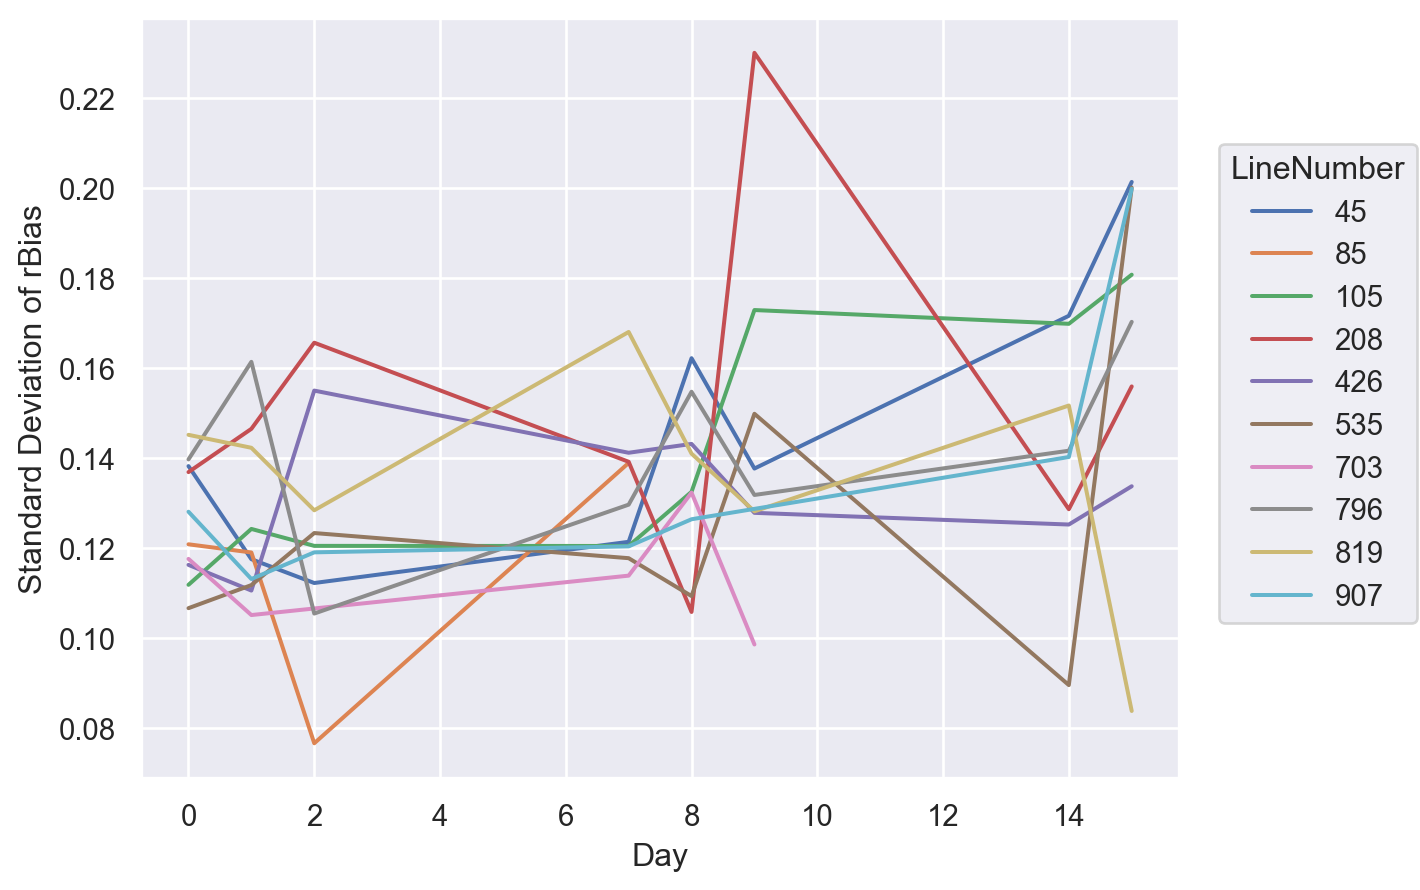

In [12]:
rp=so.Plot(data=rstd, x="Day", y="r", color="LineNumber").add(so.Line())
rp.label(y="Standard Deviation of rBias")
# rp.label

## dgrp model 7

In [13]:
a

NameError: name 'a' is not defined

In [ ]:
if os.path.exists('dgrp_model7'):
  os.remove('dgrp_model7')

stan_file2="dgrp_model7.stan"
# stan_file="dgrp_model_test.stan"
model2 = CmdStanModel(stan_file=stan_file2)

12:43:46 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7
12:43:55 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7


In [ ]:
fit = model2.sample(data=dgrp_data_sk_alld,
#  show_console=True,
  iter_sampling=1000)

12:43:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

KeyboardInterrupt: 

In [ ]:
fit.diagnose()

'Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_4.csv\n\nChecking sampler transitions treedepth.\n4000 of 4000 (100.00%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nThe E-BFMI, 0.01, is below the nominal threshold of 0.30 which suggests that HMC may h

In [ ]:
x=fit.summary()
x


Mean         MCSE       StdDev            5%  \
lp__       -1.307980e+06  1747.470000  2994.660000 -1.312200e+06   
R_obs[1]    4.220140e-01     0.011843     0.039171  3.727860e-01   
R_obs[2]    3.515020e-01     0.006238     0.018086  3.208530e-01   
R_obs[3]    4.228470e-01     0.005228     0.022888  3.894950e-01   
R_obs[4]    3.886180e-01     0.005339     0.016009  3.617640e-01   
...                  ...          ...          ...           ...   
R[1193,13]  5.503980e-01     0.006886     0.009777  5.354940e-01   
R[1193,14]  5.503980e-01     0.006886     0.009777  5.354940e-01   
R[1193,15]  5.503980e-01     0.006885     0.009776  5.354930e-01   
R[1193,16]  5.503980e-01     0.006885     0.009776  5.354960e-01   
R[1193,17]  5.503980e-01     0.006886     0.009776  5.354950e-01   

                     50%           95%     N_Eff   N_Eff/s     R_hat  
lp__       -1.308400e+06 -1.301680e+06   2.93682  0.000337   2.41225  
R_obs[1]    4.114920e-01  5.069410e-01  10.94060  0.001256   1.60636  
R_obs[2]    3.525110e-01  3.798900e-01   8.40587  0.000965   1.27623  
R_obs[3]    4.188260e-01  4.655090e-01  19.16670  0.002200   1.21934  
R_obs[4]    3.885420e-01  4.185440e-01   8.99181  0.001032   1.23060  
...                  ...           ...       ...       ...       ...  
R[1193,13]  5.536530e-01  5.638640e-01   2.01602  0.000231  23.26320  
R[1193,14]  5.536530e-01  5.638650e-01   2.01601  0.000231  23.29820  
R[1193,15]  5.536310e-01  5.638620e-01   2.01601  0.000231  23.30030  
R[1193,16]  5.536390e-01  5.638630e-01   2.01602  0.000231  23.27490  
R[1193,17]  5.535960e-01  5.638580e-01   2.01601  0.000231  23.30160  

[41792 rows x 9 columns]

Index(['lp__', 'R_obs[1]', 'R_obs[2]', 'R_obs[3]', 'R_obs[4]', 'R_obs[5]',
       'R_obs[6]', 'R_obs[7]', 'R_obs[8]', 'R_obs[9]',
       ...
       'R[1193,8]', 'R[1193,9]', 'R[1193,10]', 'R[1193,11]', 'R[1193,12]',
       'R[1193,13]', 'R[1193,14]', 'R[1193,15]', 'R[1193,16]', 'R[1193,17]'],
      dtype='object', length=41792)


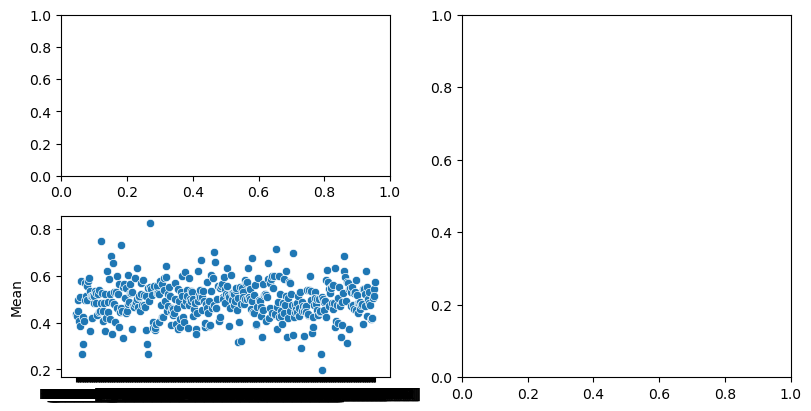

lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -1308900.0       0.736455    0.000344         10.0        1023.0   
1    -1308900.0       0.806078    0.000344         10.0        1023.0   
2    -1308920.0       0.954034    0.000344         10.0        1023.0   
3    -1308970.0       0.992575    0.000344         10.0        1023.0   
4    -1308920.0       0.893292    0.000344         10.0        1023.0   
...         ...            ...         ...          ...           ...   
3995 -1304350.0       0.240120    0.000461         10.0        1023.0   
3996 -1304580.0       0.592037    0.000461         10.0        1023.0   
3997 -1304560.0       0.877124    0.000461         10.0        1023.0   
3998 -1304290.0       0.837974    0.000461         10.0        1023.0   
3999 -1304300.0       0.614885    0.000461         10.0        1023.0   

      divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,17]  \
0             0.0  1319510.0  0.402598  0.309497  0.366500  ...    0.505002   
1             0.0  1319730.0  0.403662  0.309663  0.369572  ...    0.505015   
2             0.0  1319750.0  0.402876  0.309854  0.369928  ...    0.505059   
3             0.0  1319580.0  0.401986  0.308432  0.368931  ...    0.505034   
4             0.0  1319720.0  0.405184  0.309305  0.375997  ...    0.505165   
...           ...        ...       ...       ...       ...  ...         ...   
3995          0.0  1314860.0  0.486656  0.386837  0.433393  ...    0.544216   
3996          0.0  1315270.0  0.488091  0.388674  0.431044  ...    0.544170   
3997          0.0  1315410.0  0.488688  0.386603  0.430411  ...    0.544141   
3998          0.0  1315200.0  0.489454  0.386399  0.429675  ...    0.544184   
3999          0.0  1315060.0  0.485114  0.385563  0.428675  ...    0.544209   

      R[1185,17]  R[1186,17]  R[1187,17]  R[1188,17]  R[1189,17]  R[1190,17]  \
0       0.633200    0.560590    0.731645    0.521149    0.615186    0.397025   
1       0.633310    0.560608    0.731689    0.521174    0.615145    0.397088   
2       0.633294    0.560556    0.731637    0.521174    0.615142    0.397095   
3       0.633322    0.560580    0.731698    0.521076    0.615105    0.397052   
4       0.633262    0.560545    0.731749    0.521085    0.614995    0.397186   
...          ...         ...         ...         ...         ...         ...   
3995    0.655524    0.568568    0.746011    0.529960    0.596472    0.388730   
3996    0.655523    0.568598    0.745998    0.529923    0.596521    0.388739   
3997    0.655492    0.568638    0.745993    0.529891    0.596490    0.388688   
3998    0.655487    0.568690    0.746046    0.529848    0.596442    0.388770   
3999    0.655441    0.568671    0.745959    0.529884    0.596459    0.388629   

      R[1191,17]  R[1192,17]  R[1193,17]  
0       0.509781    0.557049    0.547140  
1       0.509745    0.557010    0.547068  
2       0.509788    0.557031    0.547079  
3       0.509787    0.557123    0.547028  
4       0.509802    0.557054    0.546990  
...          ...         ...         ...  
3995    0.509579    0.562943    0.535967  
3996    0.509627    0.562980    0.535868  
3997    0.509720    0.563037    0.535890  
3998    0.509624    0.562908    0.535898  
3999    0.509669    0.562922    0.535864  

[4000 rows x 41798 columns]

In [ ]:

x[x.index=="R[1,2]"]
print(x.index)
# print(fit.diagnose())
# fig.clear()
fig, axd=plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(8, 4), constrained_layout=True)

means=sns.scatterplot(data=x.loc["R_mean[1]":"R_mean[432]"]['Mean'])
means=means.get_figure()
plt.show(means)
fd=fit.draws_pd()
fd



In [ ]:

BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters

BH[1]     BH[2]     BH[3]     BH[4]     BH[5]     BH[6]     BH[7]  \
0     0.078387  0.106101  0.089664  0.092434  0.092074  0.074002  0.102016   
1     0.080335  0.104301  0.090325  0.092809  0.091389  0.074948  0.099559   
2     0.080572  0.103965  0.090512  0.092548  0.091507  0.074850  0.100332   
3     0.079761  0.103779  0.091012  0.092268  0.092361  0.074490  0.100902   
4     0.079433  0.107836  0.089771  0.092424  0.091947  0.074901  0.101419   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.082464  0.117494  0.082373  0.094602  0.098022  0.075438  0.094614   
3996  0.083255  0.117620  0.083858  0.095012  0.097677  0.073932  0.095943   
3997  0.083061  0.116872  0.084050  0.095879  0.097278  0.074300  0.095864   
3998  0.082243  0.117264  0.084550  0.094242  0.096964  0.075135  0.097107   
3999  0.081879  0.115139  0.084619  0.094300  0.098788  0.075908  0.097173   

         BH[8]     BH[9]    BH[10]  
0     0.106223  0.101913  0.103139  
1     0.106297  0.101558  0.103320  
2     0.106082  0.101576  0.103126  
3     0.105513  0.101660  0.103057  
4     0.103658  0.103342  0.102419  
...        ...       ...       ...  
3995  0.105110  0.114258  0.096043  
3996  0.106104  0.114779  0.096048  
3997  0.106076  0.116002  0.096013  
3998  0.107141  0.116845  0.096719  
3999  0.108865  0.114862  0.096622  

[4000 rows x 10 columns]

In [ ]:
pd.Categorical(skt["LineNumber"]).categories

Int64Index([45, 85, 105, 208, 426, 535, 703, 796, 819, 907], dtype='int64')

<Axes: ylabel='Count'>

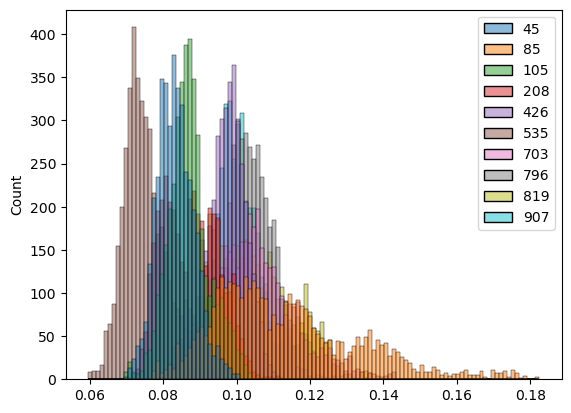

In [ ]:

BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)


<Axes: ylabel='Count'>

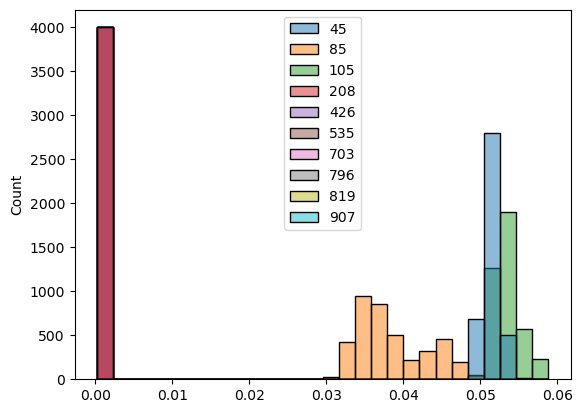

In [ ]:

D_parameters=fd.loc[:,"D[1]":"D[10]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(D_parameters)


<Axes: label='upper left', xlabel='DGRP Line', ylabel='SD of initial preference'>

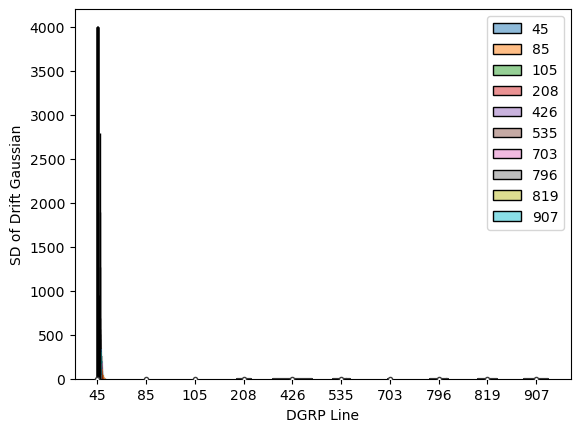

In [ ]:

# dpm=D_parameters.melt()
# dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
# sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian", ax=axs[0,1])
# # plt.savefig('Drift_SK_DGRP.pdf')

dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian", ax=axd["lower left"])
# plt.savefig('Drift_SK_DGRP.pdf')
Drift_parameters=fd.loc[:,"D[1]":"D[10]"]
Drift_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(Drift_parameters)

dpm=Drift_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian")
# sns.histplot(data=dpm, x="SD of Drift Gaussian")

# plt.savefig('Drift_SK_DGRP.pdf')
BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":"SD of initial preference"})
sns.violinplot(data=bhpm, x="DGRP Line", y="SD of initial preference", ax=axd["upper left"])
# plt.savefig('BH_SK_DGRP.pdf')


Checking Diagnose
Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4lgq13cm/dgrp_model7tx_jfct8/dgrp_model7-20230410123244_4.csv

Checking sampler transitions treedepth.
4000 of 4000 (100.00%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.01, is below the nominal threshold of 0.30 which suggests that HMC

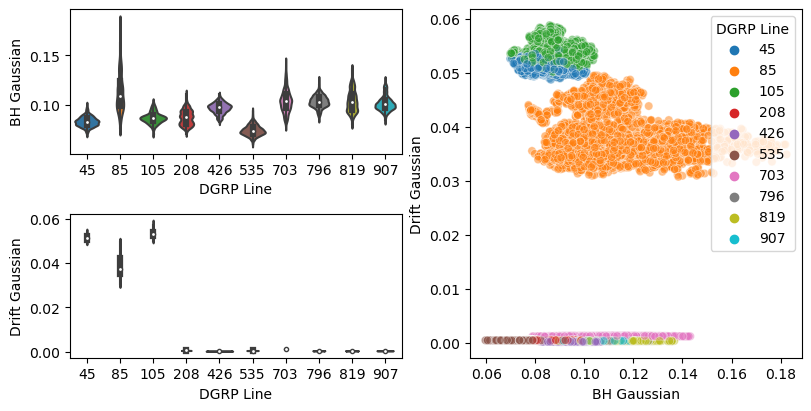

In [ ]:

import stan_helpers as sh
import imp
imp.reload(sh)
fig,fd=sh.plotResults(fit, skt, BHdes="BH Gaussian", Ddes="Drift Gaussian")
# fig

# Gaussian Model (no bounding)
this has inv_gamm priors, no E

In [16]:
if os.path.exists('dgrp_model6'):
  os.remove('dgrp_model6')

stan_file2="dgrp_model6.stan"
# stan_file="dgrp_model_test.stan"
model2 = CmdStanModel(stan_file=stan_file2)

13:18:03 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6
13:18:14 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6


In [17]:
dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}

In [18]:
fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)

13:18:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:34:24 - cmdstanpy - INFO - CmdStan done processing.
13:34:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpkosz593y/tmpupghijjv.stan', line 62, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpkosz593y/tmpupghijjv.stan', line 62, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpkosz593y/tmpupghijjv.stan', line 59, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpkosz593y/tmpupghijjv.stan', line 62, column 10 to column 44)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpkosz593y

In [19]:
print(fit.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4euqbzc4/dgrp_model66ck8y5g4/dgrp_model6-20230501131816_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4euqbzc4/dgrp_model66ck8y5g4/dgrp_model6-20230501131816_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4euqbzc4/dgrp_model66ck8y5g4/dgrp_model6-20230501131816_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp4euqbzc4/dgrp_model66ck8y5g4/dgrp_model6-20230501131816_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.20, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  R_obs[2051], R_

In [ ]:
f

In [23]:
imp.reload(sh)
fig, fd = sh.plotResults(fit, skt,
                          poplabel="DGRP line", var1="BH", var2="PHI", Des1="SD of initial Preference", Des2="Bounding Coefficient",
                          check=False)

AttributeError: Unknown variable name: B
Available variables are R_obs, D, BH, R_mis, R

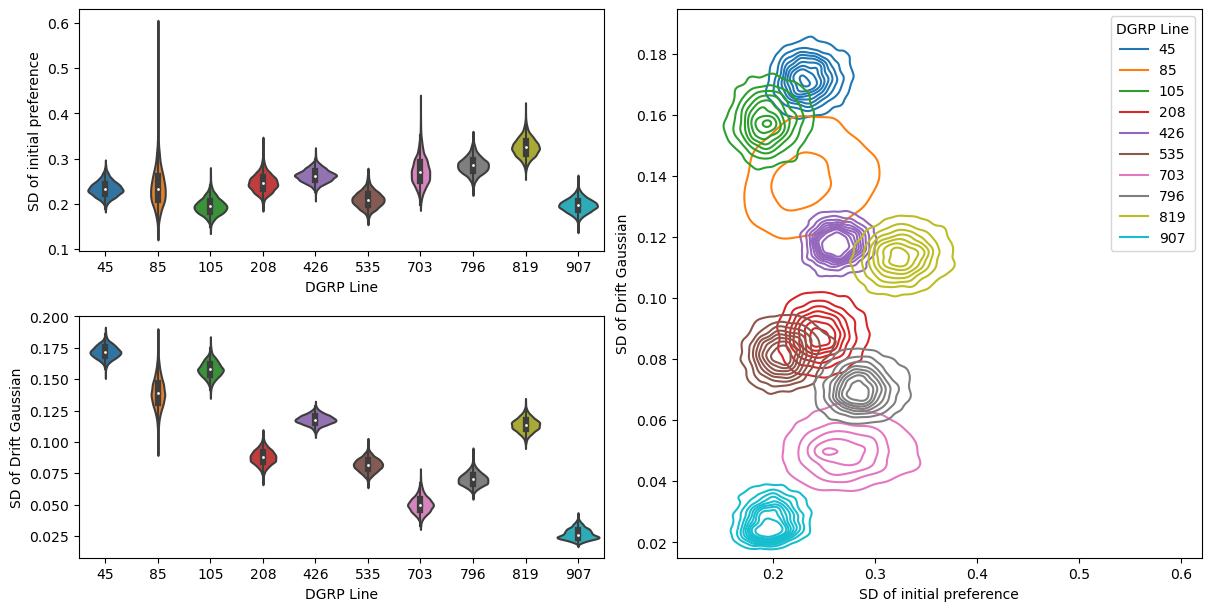

In [22]:
fig, axd=plt.subplot_mosaic([['upper left', 'right'],
                              ['lower left', 'right']],
                            figsize=(12, 6), constrained_layout=True)

BHdes="SD of initial preference"
Ddes="SD of Drift Gaussian"
fd=fit.draws_pd()

BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":BHdes})
sns.violinplot(data=bhpm, x="DGRP Line", y=BHdes, ax=axd["upper left"])


D_parameters=fd.loc[:,"D[1]":"D[10]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories


dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":Ddes})
sns.violinplot(data=dpm, x="DGRP Line", y=Ddes, ax=axd["lower left"])

dpm
bhpm[BHdes]
bhd=pd.concat([dpm, bhpm[BHdes]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.1
bhd_r["Size"]=sz
bhd_r["Size"]
sp=sns.kdeplot(data=bhd_r, x=BHdes, y=Ddes, hue="DGRP Line",
# sizes=sz,=[]
ax=axd["right"],
# alpha=.01,
)
# sp


In [ ]:
fitpd=fit.draws_pd()
fitpd


lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -1549890.0       0.769922    0.035783          7.0         127.0   
1    -1549780.0       0.914605    0.035783          7.0         127.0   
2    -1549830.0       0.853915    0.035783          7.0         127.0   
3    -1549710.0       0.972188    0.035783          7.0         127.0   
4    -1549690.0       0.951389    0.035783          7.0         127.0   
...         ...            ...         ...          ...           ...   
3995 -1549890.0       0.908306    0.035768          7.0         127.0   
3996 -1549660.0       0.934785    0.035768          7.0         127.0   
3997 -1549670.0       0.757916    0.035768          7.0         127.0   
3998 -1549610.0       0.863406    0.035768          7.0         127.0   
3999 -1549790.0       0.941138    0.035768          7.0         127.0   

      divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,17]  \
0             0.0  1559970.0 -0.303840 -0.708051  0.003848  ...    0.298838   
1             0.0  1559960.0 -0.072170 -0.635615  0.199752  ...   -1.022360   
2             0.0  1559970.0 -0.496633 -0.713720 -0.275271  ...    0.557245   
3             0.0  1559740.0  0.073168 -0.796210 -0.074189  ...   -0.124372   
4             0.0  1559990.0 -0.093782 -0.744658  0.022378  ...    1.059970   
...           ...        ...       ...       ...       ...  ...         ...   
3995          0.0  1560030.0 -0.434568 -0.788751 -0.090620  ...   -0.888212   
3996          0.0  1559870.0  0.064135 -0.699637 -0.307119  ...    0.869158   
3997          0.0  1559820.0 -0.461120 -0.838064 -0.112594  ...    1.629990   
3998          0.0  1559730.0 -0.158496 -0.729117 -0.604573  ...    1.534020   
3999          0.0  1559720.0 -0.157631 -0.704091 -0.284409  ...    1.686290   

      R[1185,17]  R[1186,17]  R[1187,17]  R[1188,17]  R[1189,17]  R[1190,17]  \
0       0.126660    0.774865    1.921580    0.641778    3.145240   -1.731190   
1       0.054137    0.845546    1.386200    1.233910    1.968020   -1.704140   
2      -0.378738    0.902878    1.104820    0.658687    0.881465   -1.621790   
3       0.076562    0.599579    0.302419   -2.070460   -0.947147    2.274280   
4       0.056892    0.000222    0.080504   -1.902710    0.375755    1.157140   
...          ...         ...         ...         ...         ...         ...   
3995    0.780818    0.415401   -1.095570    0.345607    0.151900   -0.046847   
3996    1.743660   -0.432726   -0.840207    0.307210   -0.294462   -0.751853   
3997   -0.116039   -1.071670   -1.371980   -1.550590    0.880595   -0.357164   
3998    0.313429    1.056080   -0.867597    0.866776    1.406460   -0.173873   
3999   -1.131100    0.861085   -0.012657    1.099890    1.015450    0.351762   

      R[1191,17]  R[1192,17]  R[1193,17]  
0       1.083750    1.074390    0.436679  
1       0.607737    0.125571    0.114443  
2      -0.317421   -2.058690   -0.731220  
3       1.888040    1.346110   -0.119166  
4       2.092770    1.584290   -0.615593  
...          ...         ...         ...  
3995   -1.097780   -1.121060    2.188780  
3996    0.550089   -0.294672    3.701900  
3997   -0.803978    0.676216    1.176540  
3998   -0.861530   -0.685740    1.518430  
3999   -0.841456   -0.836040    1.363850  

[4000 rows x 40593 columns]

In [ ]:
fitpd.columns

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'R_obs[1]', 'R_obs[2]', 'R_obs[3]',
       ...
       'R[1184,17]', 'R[1185,17]', 'R[1186,17]', 'R[1187,17]', 'R[1188,17]',
       'R[1189,17]', 'R[1190,17]', 'R[1191,17]', 'R[1192,17]', 'R[1193,17]'],
      dtype='object', length=40593)

In [ ]:
f1184=fitpd.loc[:,'R[1184,1]':'R[1184,17]']
f1184

R[1184,1]  R[1185,1]  R[1186,1]  R[1187,1]  R[1188,1]  R[1189,1]  \
0      0.272155   0.874642   0.117372    1.12089   0.314913   0.543242   
1      0.120522   0.901075   0.062710    1.26776   0.368398   0.335014   
2      0.481024   0.741996   0.238201    1.42132  -0.330234   0.614932   
3      0.046403   0.931719   0.128079    1.32249   0.316974   0.427950   
4      0.092689   0.936092   0.187806    1.29583   0.341275   0.362238   
...         ...        ...        ...        ...        ...        ...   
3995   0.388811   0.888742   0.248804    1.18154   0.201552   0.698020   
3996   0.109639   0.790232   0.183289    1.48254  -0.122930   0.368931   
3997   0.037915   1.002090   0.346057    1.51265   0.102153   0.477787   
3998   0.331324   0.650201   0.235954    1.47063  -0.115270   0.502322   
3999   0.278782   0.738822   0.282545    1.47552  -0.189066   0.537665   

      R[1190,1]  R[1191,1]  R[1192,1]  R[1193,1]  ...  R[1175,17]  R[1176,17]  \
0     -0.331100  -0.521441   0.258572  -0.511314  ...   -0.489078   -2.290200   
1     -0.389388  -0.402371   0.273126  -0.567207  ...   -0.830607   -2.202480   
2     -0.333433  -0.430384   0.368180   0.410120  ...   -0.725865   -1.409190   
3     -0.192436  -0.672069   0.296133   0.023642  ...    1.083420   -0.327844   
4     -0.140660  -0.664926   0.255208   0.122222  ...    1.008700    0.071839   
...         ...        ...        ...        ...  ...         ...         ...   
3995  -0.255953  -0.660438   0.342516   0.074414  ...   -0.132019    0.139294   
3996  -0.144259  -0.441219   0.314421   0.226934  ...   -0.328706   -0.751187   
3997  -0.170902  -0.411506   0.321648   0.092326  ...   -0.879746   -1.680480   
3998  -0.305068  -0.662678   0.389705   0.039536  ...    0.560939   -2.235710   
3999  -0.227022  -0.688241   0.359753   0.106166  ...   -0.902474   -2.349390   

      R[1177,17]  R[1178,17]  R[1179,17]  R[1180,17]  R[1181,17]  R[1182,17]  \
0      -0.532861   -3.102390   -0.249438    0.494695    3.310660   -1.589900   
1      -1.445490   -2.175070    0.320875    0.410332    2.927460   -0.546902   
2      -1.613150   -1.375180   -1.295540    1.733300   -0.455333   -1.238770   
3       0.489833    0.665316    0.241446   -0.875418    1.734180   -0.610971   
4      -0.477536   -0.481554   -0.334168   -0.324639    0.833138   -0.670500   
...          ...         ...         ...         ...         ...         ...   
3995    1.295810   -2.834200    2.670530   -0.004756    0.475959    2.525950   
3996   -0.190565   -0.239247    1.149740    1.036400   -0.232554    0.385046   
3997    1.427920    1.232040    1.638360    0.713519   -0.473650    1.682690   
3998   -0.259753    1.008730    0.922723   -0.143355    0.816237    2.577450   
3999    0.228875    0.395026    0.891818    0.054121    0.975663    1.800480   

      R[1183,17]  R[1184,17]  
0      -1.367470    0.298838  
1      -0.108385   -1.022360  
2      -0.090747    0.557245  
3       0.273652   -0.124372  
4       0.539253    1.059970  
...          ...         ...  
3995    1.002650   -0.888212  
3996    0.320510    0.869158  
3997    0.324093    1.629990  
3998    0.867958    1.534020  
3999    1.438550    1.686290  

[4000 rows x 19089 columns]

In [ ]:
f1184.reset_index().melt(id_vars=["index"])

index    variable     value
0             0   R[1184,1]  0.272155
1             1   R[1184,1]  0.120522
2             2   R[1184,1]  0.481024
3             3   R[1184,1]  0.046403
4             4   R[1184,1]  0.092689
...         ...         ...       ...
76355995   3995  R[1184,17] -0.888212
76355996   3996  R[1184,17]  0.869158
76355997   3997  R[1184,17]  1.629990
76355998   3998  R[1184,17]  1.534020
76355999   3999  R[1184,17]  1.686290

[76356000 rows x 3 columns]

In [ ]:
import re
f1184.melt()

variable     value
0          R[1184,1]  0.272155
1          R[1184,1]  0.120522
2          R[1184,1]  0.481024
3          R[1184,1]  0.046403
4          R[1184,1]  0.092689
...              ...       ...
76355995  R[1184,17] -0.888212
76355996  R[1184,17]  0.869158
76355997  R[1184,17]  1.629990
76355998  R[1184,17]  1.534020
76355999  R[1184,17]  1.686290

[76356000 rows x 2 columns]

In [64]:
fitpd.melt().variable

0                  lp__
1                  lp__
2                  lp__
3                  lp__
4                  lp__
                ...    
162371995    R[1193,17]
162371996    R[1193,17]
162371997    R[1193,17]
162371998    R[1193,17]
162371999    R[1193,17]
Name: variable, Length: 162372000, dtype: object

In [75]:
fvar=fitpd.melt().variable
fvar

0                  lp__
1                  lp__
2                  lp__
3                  lp__
4                  lp__
                ...    
162371995    R[1193,17]
162371996    R[1193,17]
162371997    R[1193,17]
162371998    R[1193,17]
162371999    R[1193,17]
Name: variable, Length: 162372000, dtype: object

In [81]:
vars=fitpd.columns
vars

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'R_obs[1]', 'R_obs[2]', 'R_obs[3]',
       ...
       'R[1184,17]', 'R[1185,17]', 'R[1186,17]', 'R[1187,17]', 'R[1188,17]',
       'R[1189,17]', 'R[1190,17]', 'R[1191,17]', 'R[1192,17]', 'R[1193,17]'],
      dtype='object', length=40593)

In [86]:

dataextract=vars.str.extract(r'R\[(?P<flyid>[0-9]*),(?P<day>[0-9]*)')
dataextract

flyid  day
0       NaN  NaN
1       NaN  NaN
2       NaN  NaN
3       NaN  NaN
4       NaN  NaN
...     ...  ...
40588  1189   17
40589  1190   17
40590  1191   17
40591  1192   17
40592  1193   17

[40593 rows x 2 columns]

In [90]:
dataextract["strain"]=dgrp_data_sk_m6["s"]

(1193,)

In [98]:
dataextract_nonans["flyid"]=np.array(dataextract_nonans["flyid"],dtype=int)

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_47267/1837264500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataextract_nonans["flyid"]=np.array(dataextract_nonans["flyid"],dtype=int)


In [99]:
dataextract_nonans["flyid"]

20312       1
20313       2
20314       3
20315       4
20316       5
         ... 
40588    1189
40589    1190
40590    1191
40591    1192
40592    1193
Name: flyid, Length: 20281, dtype: int64

In [103]:
dataextract_nonans["flyid"].values

array(['1', '2', '3', ..., '1191', '1192', '1193'], dtype=object)

In [109]:
dataextract_nonans=dataextract.dropna()
dataextract_nonans["Strain"]=dgrp_data_sk_m6["s"][np.array(dataextract_nonans["flyid"].values, dtype=int)-1]

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_47267/629684231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataextract_nonans["Strain"]=dgrp_data_sk_m6["s"][np.array(dataextract_nonans["flyid"].values, dtype=int)-1]


In [110]:
dataextract_nonans

flyid day  Strain
20312     1   1       1
20313     2   1       1
20314     3   1       1
20315     4   1       1
20316     5   1       1
...     ...  ..     ...
40588  1189  17       9
40589  1190  17       9
40590  1191  17       9
40591  1192  17       9
40592  1193  17       9

[20281 rows x 3 columns]

In [112]:
dataextract

flyid  day
0       NaN  NaN
1       NaN  NaN
2       NaN  NaN
3       NaN  NaN
4       NaN  NaN
...     ...  ...
40588  1189   17
40589  1190   17
40590  1191   17
40591  1192   17
40592  1193   17

[40593 rows x 2 columns]

In [118]:
fi=fitpd.T.index
fi=pd.MultiIndex([fi, dataextract])

TypeError: Must pass both levels and codes

In [138]:
fitpd.concat(dataextract)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [143]:
# fitpd["Flyid"]=dataextract["flyid"]
# fitpd

lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -1549890.0       0.769922    0.035783          7.0         127.0   
1    -1549780.0       0.914605    0.035783          7.0         127.0   
2    -1549830.0       0.853915    0.035783          7.0         127.0   
3    -1549710.0       0.972188    0.035783          7.0         127.0   
4    -1549690.0       0.951389    0.035783          7.0         127.0   
...         ...            ...         ...          ...           ...   
3995 -1549890.0       0.908306    0.035768          7.0         127.0   
3996 -1549660.0       0.934785    0.035768          7.0         127.0   
3997 -1549670.0       0.757916    0.035768          7.0         127.0   
3998 -1549610.0       0.863406    0.035768          7.0         127.0   
3999 -1549790.0       0.941138    0.035768          7.0         127.0   

      divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1185,17]  \
0             0.0  1559970.0 -0.303840 -0.708051  0.003848  ...    0.126660   
1             0.0  1559960.0 -0.072170 -0.635615  0.199752  ...    0.054137   
2             0.0  1559970.0 -0.496633 -0.713720 -0.275271  ...   -0.378738   
3             0.0  1559740.0  0.073168 -0.796210 -0.074189  ...    0.076562   
4             0.0  1559990.0 -0.093782 -0.744658  0.022378  ...    0.056892   
...           ...        ...       ...       ...       ...  ...         ...   
3995          0.0  1560030.0 -0.434568 -0.788751 -0.090620  ...    0.780818   
3996          0.0  1559870.0  0.064135 -0.699637 -0.307119  ...    1.743660   
3997          0.0  1559820.0 -0.461120 -0.838064 -0.112594  ...   -0.116039   
3998          0.0  1559730.0 -0.158496 -0.729117 -0.604573  ...    0.313429   
3999          0.0  1559720.0 -0.157631 -0.704091 -0.284409  ...   -1.131100   

      R[1186,17]  R[1187,17]  R[1188,17]  R[1189,17]  R[1190,17]  R[1191,17]  \
0       0.774865    1.921580    0.641778    3.145240   -1.731190    1.083750   
1       0.845546    1.386200    1.233910    1.968020   -1.704140    0.607737   
2       0.902878    1.104820    0.658687    0.881465   -1.621790   -0.317421   
3       0.599579    0.302419   -2.070460   -0.947147    2.274280    1.888040   
4       0.000222    0.080504   -1.902710    0.375755    1.157140    2.092770   
...          ...         ...         ...         ...         ...         ...   
3995    0.415401   -1.095570    0.345607    0.151900   -0.046847   -1.097780   
3996   -0.432726   -0.840207    0.307210   -0.294462   -0.751853    0.550089   
3997   -1.071670   -1.371980   -1.550590    0.880595   -0.357164   -0.803978   
3998    1.056080   -0.867597    0.866776    1.406460   -0.173873   -0.861530   
3999    0.861085   -0.012657    1.099890    1.015450    0.351762   -0.841456   

      R[1192,17]  R[1193,17]  Flyid  
0       1.074390    0.436679    NaN  
1       0.125571    0.114443    NaN  
2      -2.058690   -0.731220    NaN  
3       1.346110   -0.119166    NaN  
4       1.584290   -0.615593    NaN  
...          ...         ...    ...  
3995   -1.121060    2.188780    NaN  
3996   -0.294672    3.701900    NaN  
3997    0.676216    1.176540    NaN  
3998   -0.685740    1.518430    NaN  
3999   -0.836040    1.363850    NaN  

[4000 rows x 40594 columns]

In [152]:
dataextract["day"].value

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
40588     17
40589     17
40590     17
40591     17
40592     17
Name: day, Length: 40593, dtype: object

In [154]:
ft=fitpd.T
ft["Flyid"]=pd.Categorical(dataextract["flyid"])
ft["Day"]=np.array(dataextract["day"])
ft

0             1             2             3  \
lp__          -1.549890e+06 -1.549780e+06 -1.549830e+06 -1.549710e+06   
accept_stat__  7.699220e-01  9.146050e-01  8.539150e-01  9.721880e-01   
stepsize__     3.578300e-02  3.578300e-02  3.578300e-02  3.578300e-02   
treedepth__    7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00   
n_leapfrog__   1.270000e+02  1.270000e+02  1.270000e+02  1.270000e+02   
...                     ...           ...           ...           ...   
R[1189,17]     3.145240e+00  1.968020e+00  8.814650e-01 -9.471470e-01   
R[1190,17]    -1.731190e+00 -1.704140e+00 -1.621790e+00  2.274280e+00   
R[1191,17]     1.083750e+00  6.077370e-01 -3.174210e-01  1.888040e+00   
R[1192,17]     1.074390e+00  1.255710e-01 -2.058690e+00  1.346110e+00   
R[1193,17]     4.366790e-01  1.144430e-01 -7.312200e-01 -1.191660e-01   

                          4             5             6             7  \
lp__          -1.549690e+06 -1.549630e+06 -1.549570e+06 -1.549700e+06   
accept_stat__  9.513890e-01  7.185160e-01  6.783080e-01  9.341880e-01   
stepsize__     3.578300e-02  3.578300e-02  3.578300e-02  3.578300e-02   
treedepth__    7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00   
n_leapfrog__   1.270000e+02  1.270000e+02  1.270000e+02  1.270000e+02   
...                     ...           ...           ...           ...   
R[1189,17]     3.757550e-01 -6.634670e-01  5.697510e-02 -1.016790e+00   
R[1190,17]     1.157140e+00 -4.539030e-01  1.715370e+00 -8.263340e-01   
R[1191,17]     2.092770e+00  4.398830e-01  8.223350e-01 -1.333590e-01   
R[1192,17]     1.584290e+00  2.131310e-01 -7.143260e-01  5.159520e-02   
R[1193,17]    -6.155930e-01 -4.318060e-01 -9.216170e-01 -1.767020e-03   

                          8             9  ...          3992          3993  \
lp__          -1.549950e+06 -1.549870e+06  ... -1.549860e+06 -1.549930e+06   
accept_stat__  6.922760e-01  9.808760e-01  ...  9.499750e-01  8.962280e-01   
stepsize__     3.578300e-02  3.578300e-02  ...  3.576830e-02  3.576830e-02   
treedepth__    7.000000e+00  7.000000e+00  ...  7.000000e+00  7.000000e+00   
n_leapfrog__   1.270000e+02  1.270000e+02  ...  1.270000e+02  1.270000e+02   
...                     ...           ...  ...           ...           ...   
R[1189,17]    -6.277980e-01  1.209270e+00  ... -7.373840e-02 -4.167390e-01   
R[1190,17]     8.201090e-01 -1.611420e-01  ... -8.303590e-01 -8.003050e-01   
R[1191,17]    -2.489850e-01 -5.447590e-01  ... -5.607410e-01  9.321000e-01   
R[1192,17]    -5.133150e-02 -2.829660e+00  ... -3.424200e-01 -2.855220e-01   
R[1193,17]     1.194710e+00 -1.603510e+00  ...  1.061400e+00  3.481210e-01   

                       3994          3995          3996          3997  \
lp__          -1.549860e+06 -1.549890e+06 -1.549660e+06 -1.549670e+06   
accept_stat__  9.709290e-01  9.083060e-01  9.347850e-01  7.579160e-01   
stepsize__     3.576830e-02  3.576830e-02  3.576830e-02  3.576830e-02   
treedepth__    7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00   
n_leapfrog__   1.270000e+02  1.270000e+02  1.270000e+02  1.270000e+02   
...                     ...           ...           ...           ...   
R[1189,17]     1.553360e+00  1.519000e-01 -2.944620e-01  8.805950e-01   
R[1190,17]    -4.585740e-01 -4.684730e-02 -7.518530e-01 -3.571640e-01   
R[1191,17]    -1.503680e+00 -1.097780e+00  5.500890e-01 -8.039780e-01   
R[1192,17]    -5.871420e-01 -1.121060e+00 -2.946720e-01  6.762160e-01   
R[1193,17]     1.590170e+00  2.188780e+00  3.701900e+00  1.176540e+00   

                       3998          3999  Flyid  Day  
lp__          -1.549610e+06 -1.549790e+06    NaN  NaN  
accept_stat__  8.634060e-01  9.411380e-01    NaN  NaN  
stepsize__     3.576830e-02  3.576830e-02    NaN  NaN  
treedepth__    7.000000e+00  7.000000e+00    NaN  NaN  
n_leapfrog__   1.270000e+02  1.270000e+02    NaN  NaN  
...                     ...           ...    ...  ...  
R[1189,17]     1.406460e+00  1.015450e+00   1189   17  
R[1190,17]

In [158]:
obsdraws=ft.melt(id_vars=["Flyid", "Day"], var_name="Draw").dropna().reset_index(drop=True)
obsdraws

Flyid Day  Draw     value
0            1   1     0 -0.303840
1            2   1     0 -0.619797
2            3   1     0  0.369492
3            4   1     0 -0.468127
4            5   1     0 -0.599254
...        ...  ..   ...       ...
81123995  1189  17  3999  1.015450
81123996  1190  17  3999  0.351762
81123997  1191  17  3999 -0.841456
81123998  1192  17  3999 -0.836040
81123999  1193  17  3999  1.363850

[81124000 rows x 4 columns]

In [162]:
obsdraws["Strain"]=dgrp_data_sk_m6["s"][np.array(obsdraws["Flyid"], dtype=int)-1]
obsdraws

Flyid Day  Draw     value  Strain
0            1   1     0 -0.303840       1
1            2   1     0 -0.619797       1
2            3   1     0  0.369492       1
3            4   1     0 -0.468127       1
4            5   1     0 -0.599254       1
...        ...  ..   ...       ...     ...
81123995  1189  17  3999  1.015450       9
81123996  1190  17  3999  0.351762       9
81123997  1191  17  3999 -0.841456       9
81123998  1192  17  3999 -0.836040       9
81123999  1193  17  3999  1.363850       9

[81124000 rows x 5 columns]

In [164]:
import seaborn.objects as so

In [ ]:
obsdraws[obsdraws]

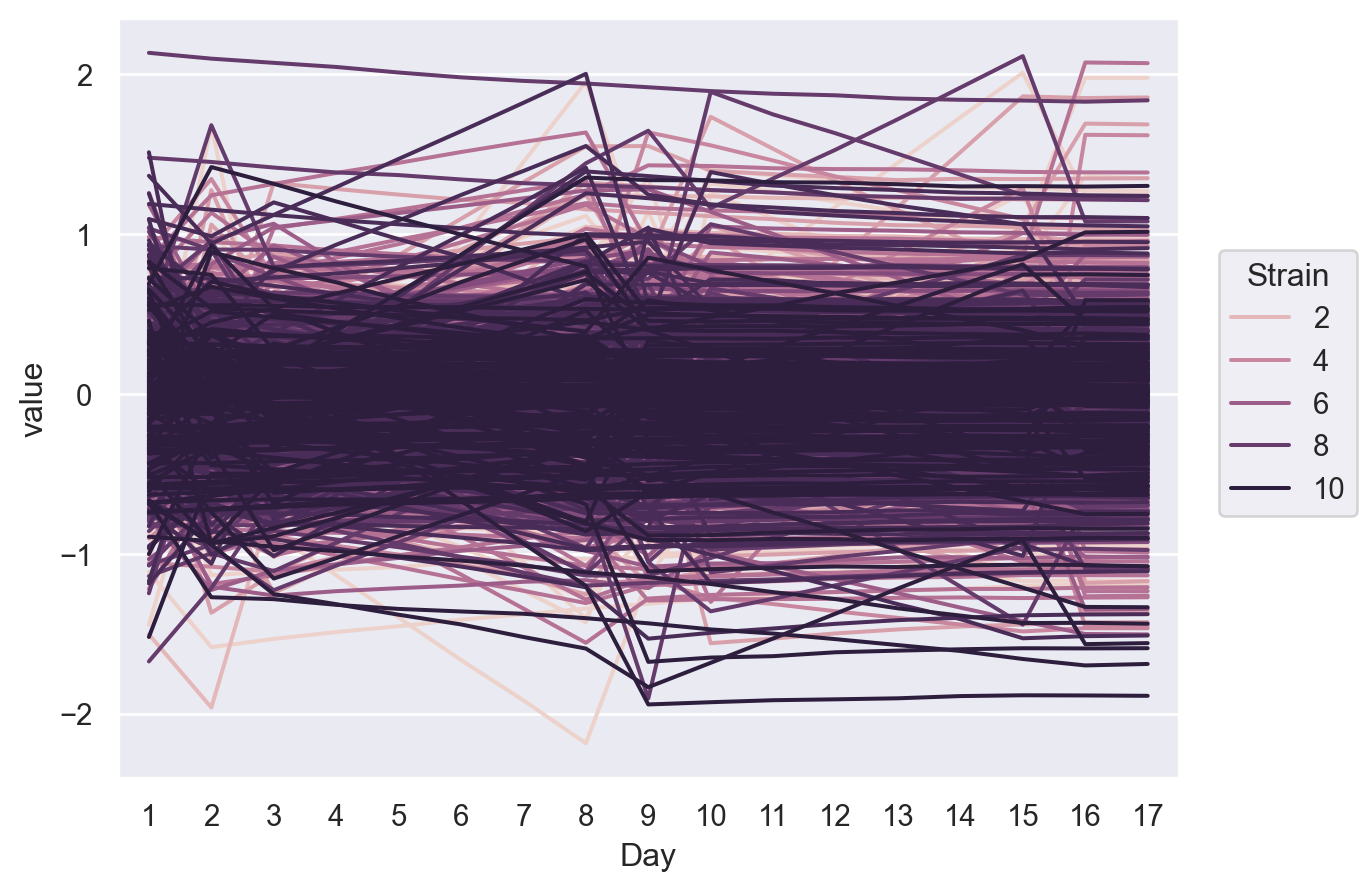

In [167]:
so.Plot(data=obsdraws, x="Day", y="value", color="Strain", group="Flyid").add(so.Line(), so.Agg(func="mean"))

In [159]:
dgrp_data_sk_m6["s"]

array([1, 1, 1, ..., 9, 9, 9], dtype=int8)

In [146]:
pd.concat([dataextract, fitpd.T], axis=0)

flyid  day         0         1         2         3         4  \
0            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
...          ...  ...       ...       ...       ...       ...       ...   
R[1189,17]   NaN  NaN  3.145240  1.968020  0.881465 -0.947147  0.375755   
R[1190,17]   NaN  NaN -1.731190 -1.704140 -1.621790  2.274280  1.157140   
R[1191,17]   NaN  NaN  1.083750  0.607737 -0.317421  1.888040  2.092770   
R[1192,17]   NaN  NaN  1.074390  0.125571 -2.058690  1.346110  1.584290   
R[1193,17]   NaN  NaN  0.436679  0.114443 -0.731220 -0.119166 -0.615593   

                   5         6         7  ...      3990      3991      3992  \
0                NaN       NaN       NaN  ...       NaN       NaN       NaN   
1                NaN       NaN       NaN  ...       NaN       NaN       NaN   
2                NaN       NaN       NaN  ...       NaN       NaN       NaN   
3                NaN       NaN       NaN  ...       NaN       NaN       NaN   
4                NaN       NaN       NaN  ...       NaN       NaN       NaN   
...              ...       ...       ...  ...       ...       ...       ...   
R[1189,17] -0.663467  0.056975 -1.016790  ... -1.007300 -0.389330 -0.073738   
R[1190,17] -0.453903  1.715370 -0.826334  ...  0.587681 -0.911884 -0.830359   
R[1191,17]  0.439883  0.822335 -0.133359  ... -2.026050 -0.878768 -0.560741   
R[1192,17]  0.213131 -0.714326  0.051595  ...  0.467470 -0.984331 -0.342420   
R[1193,17] -0.431806 -0.921617 -0.001767  ...  0.484928 -0.402587  1.061400   

                3993      3994      3995      3996      3997      3998  \
0                NaN       NaN       NaN       NaN       NaN       NaN   
1                NaN       NaN       NaN       NaN       NaN       NaN   
2                NaN       NaN       NaN       NaN       NaN       NaN   
3                NaN       NaN       NaN       NaN       NaN       NaN   
4                NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
R[1189,17] -0.416739  1.553360  0.151900 -0.294462  0.880595  1.406460   
R[1190,17] -0.800305 -0.458574 -0.046847 -0.751853 -0.357164 -0.173873   
R[1191,17]  0.932100 -1.503680 -1.097780  0.550089 -0.803978 -0.861530   
R[1192,17] -0.285522 -0.587142 -1.121060 -0.294672  0.676216 -0.685740   
R[1193,17]  0.348121  1.590170  2.188780  3.701900  1.176540  1.518430   

                3999  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
R[1189,17]  1.015450  
R[1190,17]  0.351762  
R[1191,17] -0.841456  
R[1192,17] -0.836040  
R[1193,17]  1.363850  

[81186 rows x 4002 columns]

In [128]:
fi.to_series().reset_index()["index"]

0                 lp__
1        accept_stat__
2           stepsize__
3          treedepth__
4         n_leapfrog__
             ...      
40588       R[1189,17]
40589       R[1190,17]
40590       R[1191,17]
40591       R[1192,17]
40592       R[1193,17]
Name: index, Length: 40593, dtype: object

# AR term

In [16]:
modelname="dmodel6_AR_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"

model_AR = CmdStanModel(stan_file=stan_file)


15:17:54 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed
15:18:02 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed


In [15]:

dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}
# fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
#   iter_sampling=1000)

In [17]:
fit3 = model_AR.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)

15:18:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:20:56 - cmdstanpy - INFO - CmdStan done processing.
15:20:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp2nafyayy/tmp_vmpeabx.stan', line 78, column 10 to column 51)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp2nafyayy/tmp_vmpeabx.stan', line 78, column 10 to column 51)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp2nafyayy/tmp_vmpeabx.stan', line 78, column 10 to column 51)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp2nafyayy/tmp_vmpeabx.stan', line 78, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp2nafyay

In [18]:
fitar=fit3

In [19]:
pd.Categorical(skt["LineNumber"]).categories

Int64Index([45, 85, 105, 208, 426, 535, 703, 796, 819, 907], dtype='int64')

In [20]:
print(fit3.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbjj97hi2/dmodel6_AR_transformedqaeo2d7t/dmodel6_AR_transformed-20230609151808_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbjj97hi2/dmodel6_AR_transformedqaeo2d7t/dmodel6_AR_transformed-20230609151808_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbjj97hi2/dmodel6_AR_transformedqaeo2d7t/dmodel6_AR_transformed-20230609151808_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbjj97hi2/dmodel6_AR_transformedqaeo2d7t/dmodel6_AR_transformed-20230609151808_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.28, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size sati

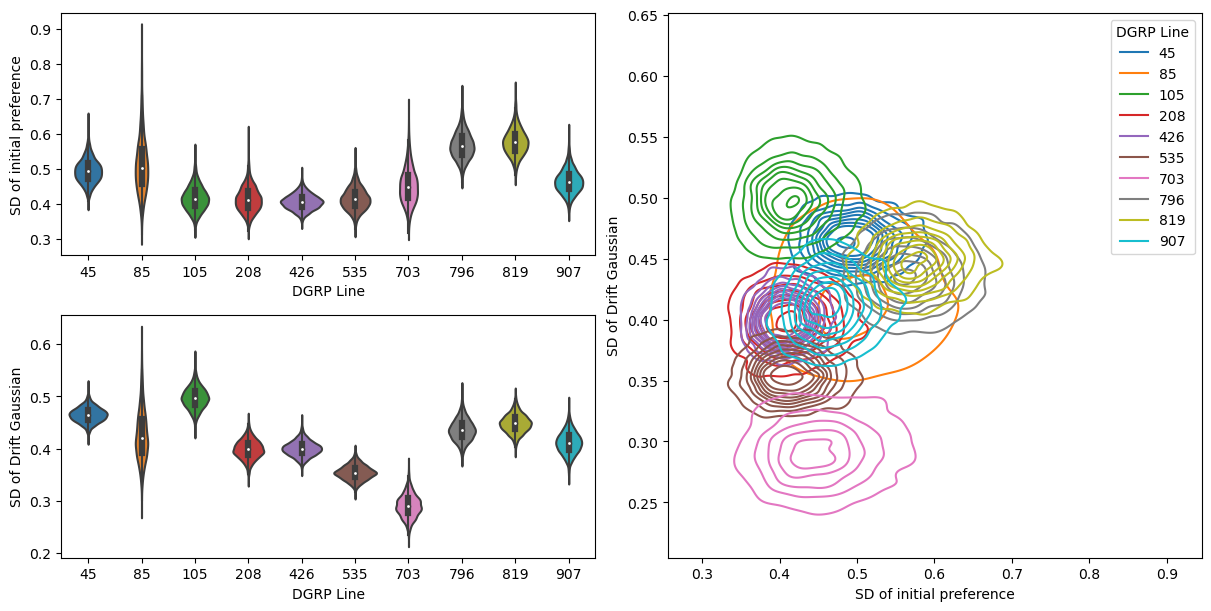

In [26]:
fig, axd=plt.subplot_mosaic([['upper left', 'right'],
                              ['lower left', 'right']],
                            figsize=(12, 6), constrained_layout=True)

BHdes="SD of initial preference"
Ddes="SD of Drift Gaussian"
fd=fit3.draws_pd()

BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":BHdes})
sns.violinplot(data=bhpm, x="DGRP Line", y=BHdes, ax=axd["upper left"])


D_parameters=fd.loc[:,"D[1]":"D[10]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories


dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":Ddes})
sns.violinplot(data=dpm, x="DGRP Line", y=Ddes, ax=axd["lower left"])

dpm
bhpm[BHdes]
bhd=pd.concat([dpm, bhpm[BHdes]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.1
bhd_r["Size"]=sz
bhd_r["Size"]
sp=sns.kdeplot(data=bhd_r, x=BHdes, y=Ddes, hue="DGRP Line",
# sizes=sz,=[]
ax=axd["right"],
# alpha=.01,
)
# sp


(<Figure size 1200x600 with 3 Axes>,
            lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
 0    -1551800.0       0.727361    0.070606          6.0          63.0   
 1    -1551650.0       0.907232    0.070606          6.0          63.0   
 2    -1551720.0       0.792311    0.070606          6.0          63.0   
 3    -1551820.0       0.812933    0.070606          6.0          63.0   
 4    -1551900.0       0.762720    0.070606          6.0          63.0   
 ...         ...            ...         ...          ...           ...   
 3995 -1552000.0       0.838504    0.071789          6.0          63.0   
 3996 -1551790.0       0.967267    0.071789          6.0          63.0   
 3997 -1551700.0       0.954848    0.071789          6.0          63.0   
 3998 -1551650.0       0.997660    0.071789          6.0          63.0   
 3999 -1551870.0       0.930321    0.071789          6.0          63.0   
 
       divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,

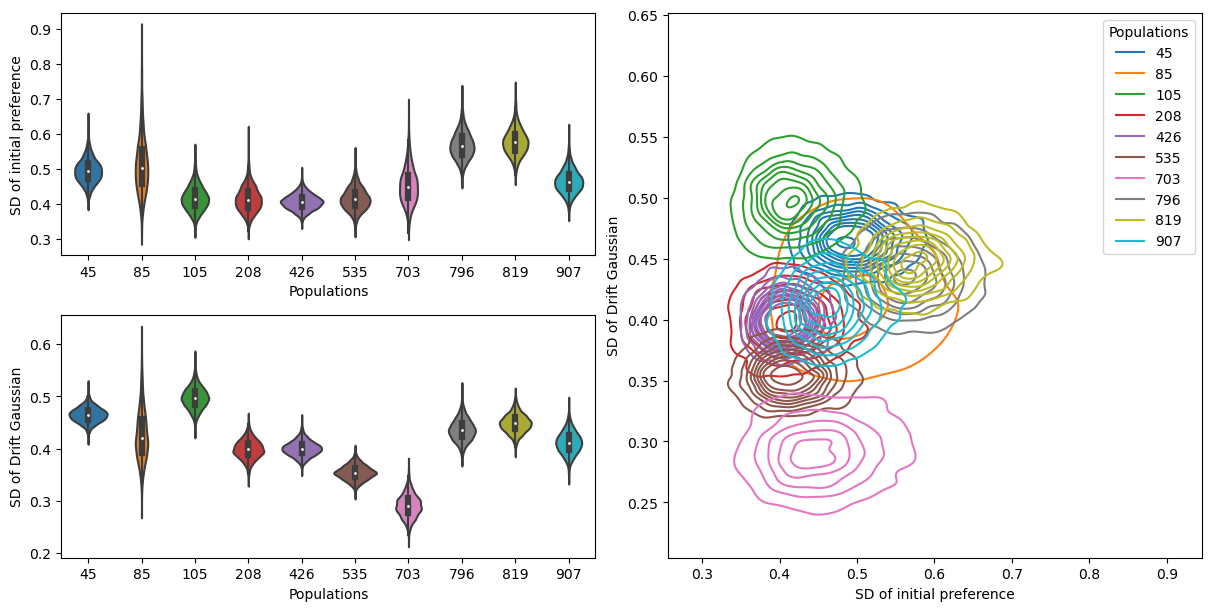

In [27]:
sh.plotResults(fit3, pd.Categorical(skt["LineNumber"]).categories)

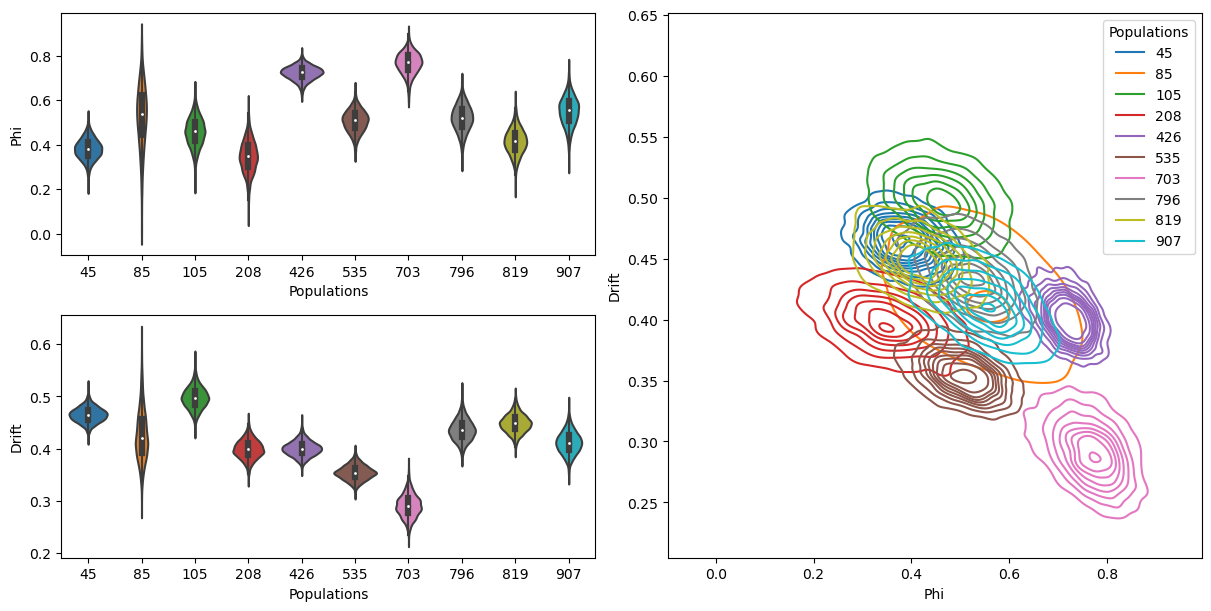

In [30]:
fig, fd= sh.plotResults(fit3, pd.Categorical(skt["LineNumber"]).categories, var1="D", var2="PHI", Des1="Drift", Des2="Phi")

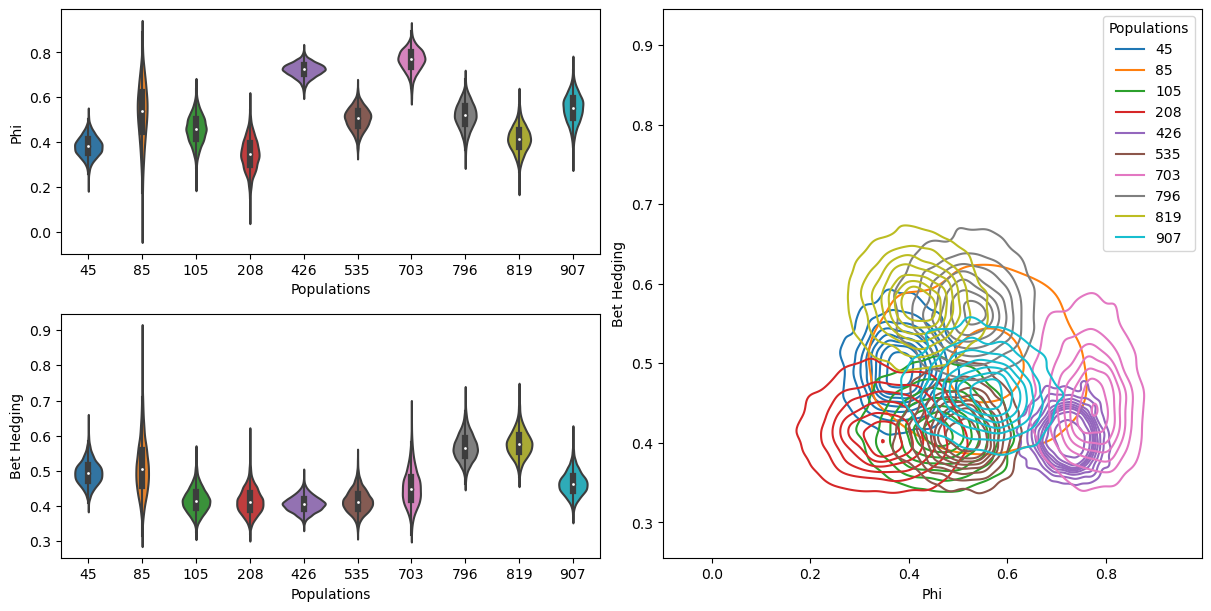

In [31]:
fig, fd= sh.plotResults(fit3, pd.Categorical(skt["LineNumber"]).categories, var1="BH", var2="PHI", Des1="Bet Hedging", Des2="Phi")

In [25]:
pd.Categorical(skt["LineNumber"]).categories.shape

(10,)

In [58]:
pd.Categorical(skt["LineNumber"]).categories.shape[0]

10

uID  BatchNumber  TrayNumber  FlyID  LineNumber  Sex  n_Week1Day1  \
0        0            1           1      1          45    1           54   
1        1            1           1      2          45    1          873   
2        2            1           1      3          45    1          196   
3        3            1           1      4          45    1            3   
4        4            1           1      5          45    1            0   
...    ...          ...         ...    ...         ...  ...          ...   
1188  1188            5           2     92         819    0          343   
1189  1189            5           2     93         819    0          281   
1190  1190            5           2     94         819    0          126   
1191  1191            5           2     95         819    0          472   
1192  1192            5           2     96         819    0           39   

      rBias_Week1Day1  n_Week1Day2  rBias_Week1Day2  ...  n_Week2Day2  \
0            0.509434        610.0         0.316913  ...        774.0   
1            0.321101        217.0         0.601852  ...        452.0   
2            0.635897        686.0         0.400000  ...         -1.0   
3            0.500000        257.0         0.378906  ...         -1.0   
4                 NaN        726.0         0.388966  ...         -1.0   
...               ...          ...              ...  ...          ...   
1188         0.654971        158.0         0.477707  ...        326.0   
1189         0.435714         31.0         0.566667  ...        209.0   
1190         0.328000        395.0         0.428934  ...        562.0   
1191         0.585987        363.0         0.651934  ...        243.0   
1192         0.552632        133.0         0.560606  ...        356.0   

      rBias_Week2Day2  n_Week2Day3  rBias_Week2Day3  n_Week3Day1  \
0            0.495472        387.0         0.383420        741.0   
1            0.308204        197.0         0.535714         -1.0   
2                 NaN         -1.0              NaN         -1.0   
3                 NaN         -1.0              NaN         -1.0   
4                 NaN         -1.0              NaN         -1.0   
...               ...          ...              ...          ...   
1188         0.646154        212.0         0.545024          NaN   
1189         0.389423          0.0              NaN          NaN   
1190         0.556150        328.0         0.425076          NaN   
1191         0.504132         -1.0              NaN          NaN   
1192         0.628169        231.0         0.500000          NaN   

      rBias_Week3Day1  n_Week3Day2  rBias_Week3Day2  n_Week3Day3  \
0            0.535135          NaN              NaN         -1.0   
1                 NaN          NaN              NaN         -1.0   
2                 NaN          NaN              NaN         -1.0   
3                 NaN          NaN              NaN         -1.0   
4                 NaN          NaN              NaN         -1.0   
...               ...          ...              ...          ...   
1188              NaN          NaN              NaN          NaN   
1189              NaN          NaN              NaN          NaN   
1190              NaN          NaN              NaN          NaN   
1191              NaN          NaN              NaN          NaN   
1192              NaN          NaN              NaN          NaN   

      rBias_Week3Day3  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1188              NaN  
1189              NaN  
1190              NaN  
1191              NaN  
1192              NaN  

[1193 rows x 24 columns]

In [68]:
pd.Categorical(np.array(skt["LineNumber"], dtype=str) ).categories

Index(['105', '208', '426', '45', '535', '703', '796', '819', '85', '907'], dtype='object')

In [1]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3, poplabels=pd.Categorical(np.array(skt["LineNumber"], dtype=str) ).categories, var1="BH", var2="D", check=False)
# fig.rename(columns={"variable":"Populations", "value":"D"})
# fig

NameError: name 'imp' is not defined

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_80729/1212992508.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


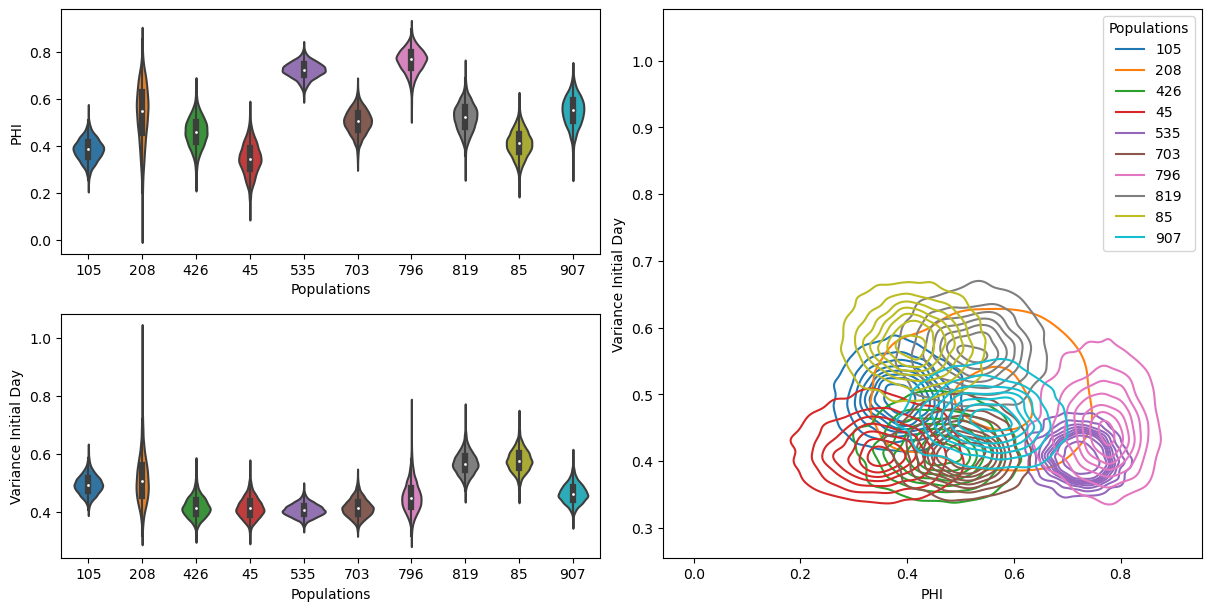

In [84]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3, poplabels=pd.Categorical(np.array(skt["LineNumber"], dtype=str) ).categories,
                         Des1="Variance Initial Day", Des2="PHI", check=False, var1="BH", var2="PHI")
fig.show()

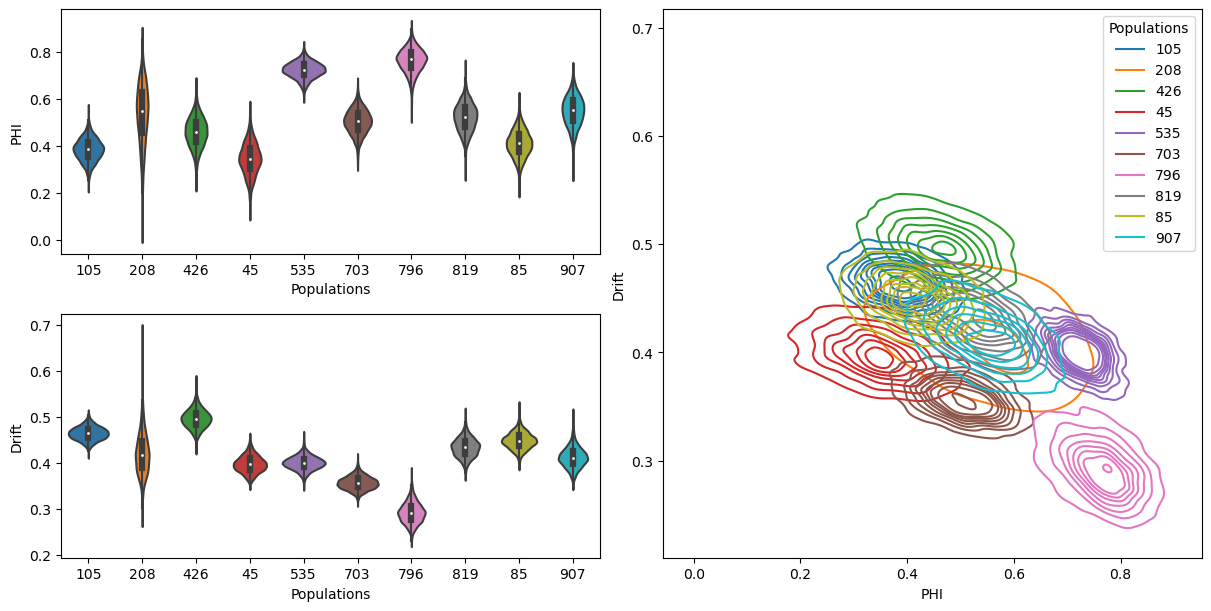

In [86]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3,
                          poplabels=pd.Categorical(np.array(skt["LineNumber"], dtype=str) ).categories,
                           Des1="Drift", Des2="PHI", check=False, var1="D", var2="PHI")

# AR, single phi


In [175]:
modelname="dmodel6_AR_singlephi"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"

model_AR = CmdStanModel(stan_file=stan_file)

17:11:19 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi
17:11:28 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi


In [ ]:

dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}
# fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
#   iter_sampling=1000)

In [176]:
fit_AR_singlephi = model_AR.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)

17:11:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:14:19 - cmdstanpy - INFO - CmdStan done processing.
17:14:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbgvh_q0l/tmpqpnocbp6.stan', line 75, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbgvh_q0l/tmpqpnocbp6.stan', line 80, column 10 to column 48)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbgvh_q0l/tmpqpnocbp6.stan', line 75, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbgvh_q0l/tmpqpnocbp6.stan', line 80, column 10 to column 48)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpbgvh_q0l/t

In [177]:
print(fit_AR_singlephi.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephi4ovrvsta/dmodel6_AR_singlephi-20230508171145_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephi4ovrvsta/dmodel6_AR_singlephi-20230508171145_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephi4ovrvsta/dmodel6_AR_singlephi-20230508171145_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephi4ovrvsta/dmodel6_AR_singlephi-20230508171145_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.23, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

Split

(<Figure size 1200x600 with 3 Axes>,
            lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
 0    -1551770.0       0.855740    0.098110          6.0          63.0   
 1    -1551740.0       0.959740    0.098110          6.0          63.0   
 2    -1551630.0       0.792083    0.098110          6.0          63.0   
 3    -1551660.0       0.961082    0.098110          6.0          63.0   
 4    -1551670.0       0.803078    0.098110          6.0          63.0   
 ...         ...            ...         ...          ...           ...   
 3995 -1552290.0       0.988856    0.088836          6.0          63.0   
 3996 -1552140.0       0.833579    0.088836          6.0          63.0   
 3997 -1552210.0       0.946192    0.088836          6.0          63.0   
 3998 -1552340.0       0.826791    0.088836          6.0          63.0   
 3999 -1552160.0       0.970037    0.088836          6.0          63.0   
 
       divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,

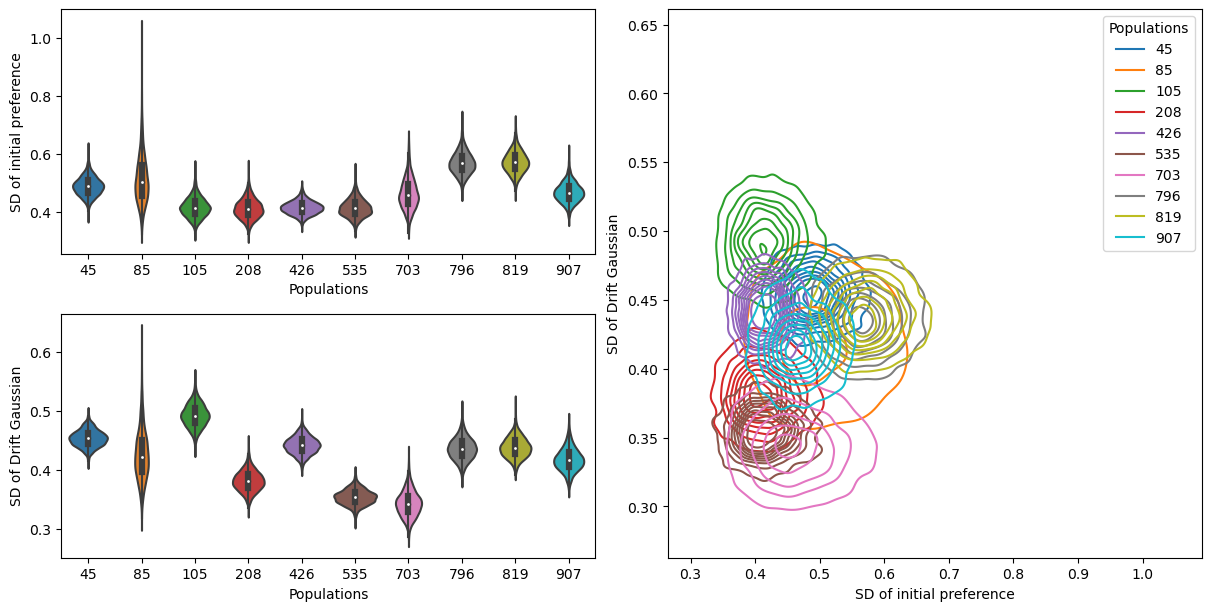

In [178]:
sh.plotResults(fit_AR_singlephi, pd.Categorical(skt["LineNumber"]).categories)

Text(0, 0.5, 'Value')

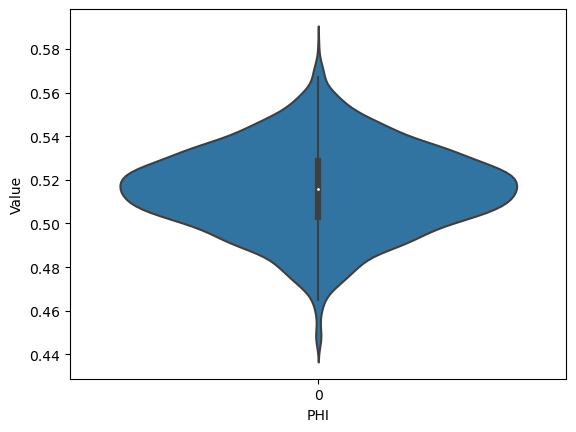

In [185]:
draws=fit_AR_singlephi.draws_pd()
a=sns.violinplot(draws["PHI"])
a.set_xlabel("PHI")
a.set_ylabel("Value")

KeyError: 'PHI[1]'

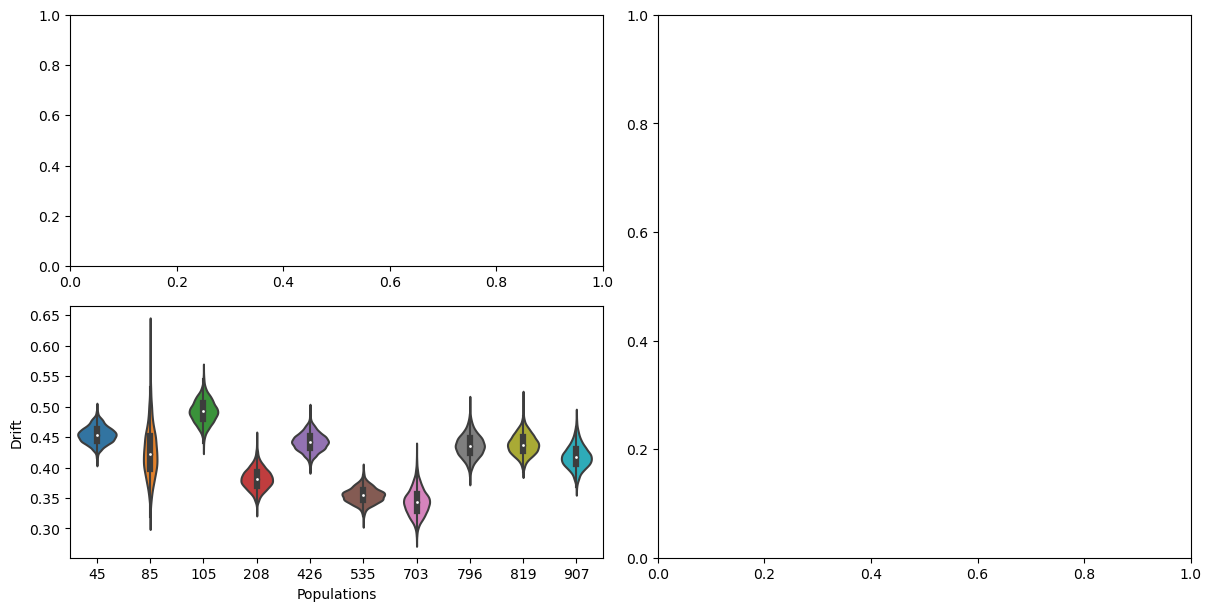

In [179]:
fig, fd= sh.plotResults(fit_AR_singlephi, pd.Categorical(skt["LineNumber"]).categories, var1="D", var2="PHI", Des1="Drift", Des2="Phi")

# Bounding, except scaling bounding coefficient 

In [169]:
modelname="dmodel6_bounding_scaled_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
model3 = CmdStanModel(stan_file=stan_file)


14:50:19 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed
14:50:28 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed


In [102]:
skt_unmelted_obs["Day"].max()+2

17.0

In [170]:
dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0], #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}


In [146]:
pd.Categorical(skt["LineNumber"]).categories

Int64Index([45, 85, 105, 208, 426, 535, 703, 796, 819, 907], dtype='int64')

In [145]:
np.unique(skt_unmelted_obs["LineNumber"])

array([ 45,  85, 105, 208, 426, 535, 703, 796, 819, 907])

In [138]:
skt

uID  BatchNumber  TrayNumber  FlyID  LineNumber  Sex  n_Week1Day1  \
0        0            1           1      1          45    1           54   
1        1            1           1      2          45    1          873   
2        2            1           1      3          45    1          196   
3        3            1           1      4          45    1            3   
4        4            1           1      5          45    1            0   
...    ...          ...         ...    ...         ...  ...          ...   
1188  1188            5           2     92         819    0          343   
1189  1189            5           2     93         819    0          281   
1190  1190            5           2     94         819    0          126   
1191  1191            5           2     95         819    0          472   
1192  1192            5           2     96         819    0           39   

      rBias_Week1Day1  n_Week1Day2  rBias_Week1Day2  ...  n_Week2Day2  \
0            0.509434        610.0         0.316913  ...        774.0   
1            0.321101        217.0         0.601852  ...        452.0   
2            0.635897        686.0         0.400000  ...         -1.0   
3            0.500000        257.0         0.378906  ...         -1.0   
4                 NaN        726.0         0.388966  ...         -1.0   
...               ...          ...              ...  ...          ...   
1188         0.654971        158.0         0.477707  ...        326.0   
1189         0.435714         31.0         0.566667  ...        209.0   
1190         0.328000        395.0         0.428934  ...        562.0   
1191         0.585987        363.0         0.651934  ...        243.0   
1192         0.552632        133.0         0.560606  ...        356.0   

      rBias_Week2Day2  n_Week2Day3  rBias_Week2Day3  n_Week3Day1  \
0            0.495472        387.0         0.383420        741.0   
1            0.308204        197.0         0.535714         -1.0   
2                 NaN         -1.0              NaN         -1.0   
3                 NaN         -1.0              NaN         -1.0   
4                 NaN         -1.0              NaN         -1.0   
...               ...          ...              ...          ...   
1188         0.646154        212.0         0.545024          NaN   
1189         0.389423          0.0              NaN          NaN   
1190         0.556150        328.0         0.425076          NaN   
1191         0.504132         -1.0              NaN          NaN   
1192         0.628169        231.0         0.500000          NaN   

      rBias_Week3Day1  n_Week3Day2  rBias_Week3Day2  n_Week3Day3  \
0            0.535135          NaN              NaN         -1.0   
1                 NaN          NaN              NaN         -1.0   
2                 NaN          NaN              NaN         -1.0   
3                 NaN          NaN              NaN         -1.0   
4                 NaN          NaN              NaN         -1.0   
...               ...          ...              ...          ...   
1188              NaN          NaN              NaN          NaN   
1189              NaN          NaN              NaN          NaN   
1190              NaN          NaN              NaN          NaN   
1191              NaN          NaN              NaN          NaN   
1192              NaN          NaN              NaN          NaN   

      rBias_Week3Day3  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1188              NaN  
1189              NaN  
1190              NaN  
1191              NaN  
1192              NaN  

[1193 rows x 24 columns]

In [130]:
np.unique(pd.Categorical(skt["LineNumber"]).codes+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

<Axes: ylabel='Count'>

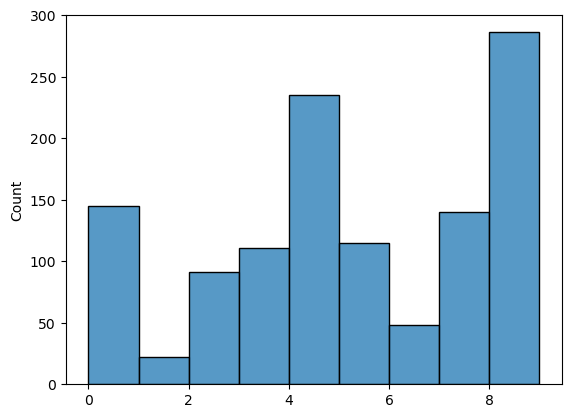

In [133]:
sns.histplot(pd.Categorical(skt["LineNumber"]).codes, bins=9)

In [122]:
skt_unmelted_obs["LineNumber"].unique()

array([ 45, 535, 105, 796, 208, 819, 907, 426,  85, 703])

In [120]:
np.unique((pd.Categorical(skt["LineNumber"]).codes+1))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

In [172]:

# fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
#   iter_sampling=1000)
fit3 = model3.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)

14:52:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:02:43 - cmdstanpy - INFO - CmdStan done processing.
15:02:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpxy1osl_c/tmpcuym5qd1.stan', line 78, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpxy1osl_c/tmpcuym5qd1.stan', line 78, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpxy1osl_c/tmpcuym5qd1.stan', line 74, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpxy1osl_c/tmpcuym5qd1.stan', line 78, column 10 to column 44)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpxy1osl_c

In [105]:
print(fit3.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_bounding_scaled_transformedkt5l45q7/dmodel6_bounding_scaled_transformed-20230508120331_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_bounding_scaled_transformedkt5l45q7/dmodel6_bounding_scaled_transformed-20230508120331_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_bounding_scaled_transformedkt5l45q7/dmodel6_bounding_scaled_transformed-20230508120331_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_bounding_scaled_transformedkt5l45q7/dmodel6_bounding_scaled_transformed-20230508120331_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all paramet

In [27]:
f3s=fit3.summary()

Mean      MCSE      StdDev            5%           50%  \
lp__       -1.485650e+06  7.233970  171.575000 -1.485920e+06 -1.485650e+06   
R_obs[1]   -2.471130e-01  0.002484    0.180592 -5.465800e-01 -2.479310e-01   
R_obs[2]   -6.333090e-01  0.001109    0.077525 -7.615460e-01 -6.328040e-01   
R_obs[3]   -1.425980e-01  0.002322    0.157943 -4.082910e-01 -1.416290e-01   
R_obs[4]   -4.511150e-01  0.001109    0.078464 -5.806060e-01 -4.503350e-01   
...                  ...       ...         ...           ...           ...   
R[1193,13] -5.387910e-04  0.001650    0.104858 -1.722830e-01  1.981230e-03   
R[1193,14]  6.177390e-06  0.001761    0.108287 -1.770420e-01 -7.324100e-04   
R[1193,15]  7.994860e-04  0.001621    0.104024 -1.692750e-01  3.992240e-04   
R[1193,16]  3.600360e-04  0.001659    0.105718 -1.715210e-01 -1.655280e-03   
R[1193,17]  1.186050e-04  0.001853    0.123272 -1.969870e-01 -1.647720e-03   

                     95%     N_Eff   N_Eff/s     R_hat  
lp__       -1.485370e+06   562.542  0.770878  1.011690  
R_obs[1]    5.234530e-02  5285.590  7.243090  0.999841  
R_obs[2]   -5.058740e-01  4890.810  6.702100  0.999244  
R_obs[3]    1.113020e-01  4627.610  6.341430  0.999347  
R_obs[4]   -3.215710e-01  5008.050  6.862770  1.000030  
...                  ...       ...       ...       ...  
R[1193,13]  1.683090e-01  4039.850  5.536000  1.000010  
R[1193,14]  1.820130e-01  3780.580  5.180710  1.000980  
R[1193,15]  1.679560e-01  4118.840  5.644240  1.001200  
R[1193,16]  1.780650e-01  4059.070  5.562340  1.000710  
R[1193,17]  2.027010e-01  4425.530  6.064510  0.999649  

[40599 rows x 9 columns]

In [106]:
f3s["50%"]

lp__         -1.485650e+06
R_obs[1]     -2.479310e-01
R_obs[2]     -6.328040e-01
R_obs[3]     -1.416290e-01
R_obs[4]     -4.503350e-01
                  ...     
R[1193,13]    1.981230e-03
R[1193,14]   -7.324100e-04
R[1193,15]    3.992240e-04
R[1193,16]   -1.655280e-03
R[1193,17]   -1.647720e-03
Name: 50%, Length: 40599, dtype: float64

In [139]:
f3d=fit3.draws_pd()

In [140]:
var1="D" 
numfits=10
start1=var1+"["+"1"+"]"
end1=var1+"["+str(numfits)+"]"
D_parameters=f3d.loc[:,start1:end1]
D_parameters

D[1]      D[2]      D[3]      D[4]      D[5]      D[6]      D[7]  \
0     0.296022  0.241846  0.293036  0.001253  0.186804  0.157433  0.160686   
1     0.280639  0.227579  0.295468  0.001223  0.179644  0.161787  0.139239   
2     0.280756  0.238447  0.303979  0.001228  0.187235  0.161835  0.145327   
3     0.281018  0.228596  0.299460  0.001247  0.190549  0.152868  0.138640   
4     0.284745  0.237447  0.299888  0.001286  0.190642  0.157833  0.143178   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.292523  0.220804  0.294560  0.001266  0.190314  0.162531  0.150861   
3996  0.291545  0.223740  0.291893  0.001256  0.191035  0.162933  0.150023   
3997  0.290832  0.226098  0.296166  0.001235  0.185747  0.157522  0.145336   
3998  0.290567  0.218229  0.289901  0.001235  0.193678  0.162140  0.148994   
3999  0.276139  0.228890  0.293181  0.001250  0.192053  0.163952  0.146280   

          D[8]      D[9]     D[10]  
0     0.158022  0.154724  0.001011  
1     0.162618  0.155567  0.000998  
2     0.161753  0.171124  0.001031  
3     0.162580  0.156759  0.000970  
4     0.161076  0.159641  0.000977  
...        ...       ...       ...  
3995  0.160654  0.162295  0.000999  
3996  0.160984  0.161679  0.001002  
3997  0.162137  0.159153  0.001003  
3998  0.164948  0.156095  0.000977  
3999  0.161079  0.160152  0.001005  

[4000 rows x 10 columns]

In [147]:
D_parameters.drop(columns=[3])

KeyError: '[3] not found in axis'

In [155]:
D_parameters.columns[0]

'D[1]'

In [110]:
D_parameters.drop(columns=["D[4]", "D[10]"])

D[1]      D[2]      D[3]      D[5]      D[6]      D[7]      D[8]  \
0     0.296022  0.241846  0.293036  0.186804  0.157433  0.160686  0.158022   
1     0.280639  0.227579  0.295468  0.179644  0.161787  0.139239  0.162618   
2     0.280756  0.238447  0.303979  0.187235  0.161835  0.145327  0.161753   
3     0.281018  0.228596  0.299460  0.190549  0.152868  0.138640  0.162580   
4     0.284745  0.237447  0.299888  0.190642  0.157833  0.143178  0.161076   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.292523  0.220804  0.294560  0.190314  0.162531  0.150861  0.160654   
3996  0.291545  0.223740  0.291893  0.191035  0.162933  0.150023  0.160984   
3997  0.290832  0.226098  0.296166  0.185747  0.157522  0.145336  0.162137   
3998  0.290567  0.218229  0.289901  0.193678  0.162140  0.148994  0.164948   
3999  0.276139  0.228890  0.293181  0.192053  0.163952  0.146280  0.161079   

          D[9]  
0     0.154724  
1     0.155567  
2     0.171124  
3     0.156759  
4     0.159641  
...        ...  
3995  0.162295  
3996  0.161679  
3997  0.159153  
3998  0.156095  
3999  0.160152  

[4000 rows x 8 columns]

In [111]:
D_parameters.melt()

variable     value
0         D[1]  0.296022
1         D[1]  0.280639
2         D[1]  0.280756
3         D[1]  0.281018
4         D[1]  0.284745
...        ...       ...
39995    D[10]  0.000999
39996    D[10]  0.001002
39997    D[10]  0.001003
39998    D[10]  0.000977
39999    D[10]  0.001005

[40000 rows x 2 columns]

In [112]:
skt_unmelted_obs["LineNumber"].unique()

array([ 45, 535, 105, 796, 208, 819, 907, 426,  85, 703])

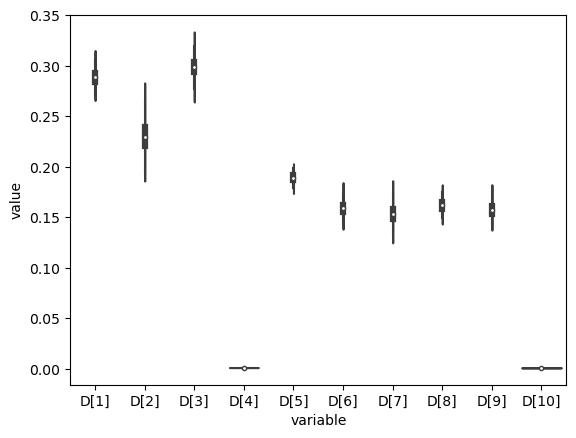

In [113]:
# ax=sns.swarmplot(data=D_parameters.melt(), x="variable", y="value")
ax=sns.violinplot(data=D_parameters.melt(), x="variable", y="value")

In [88]:
f3s.loc[f3s["summary_rownames"]=="BH[1]", "summary_rownames"]="BH[1-10]"

KeyError: 'summary_rownames'

In [24]:
skt["LineNumber"].unique()

array([ 45, 535, 105, 796, 208, 819, 907, 426,  85, 703])

In [156]:
imp.reload(sh)

<module 'stan_helpers' from '/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py'>

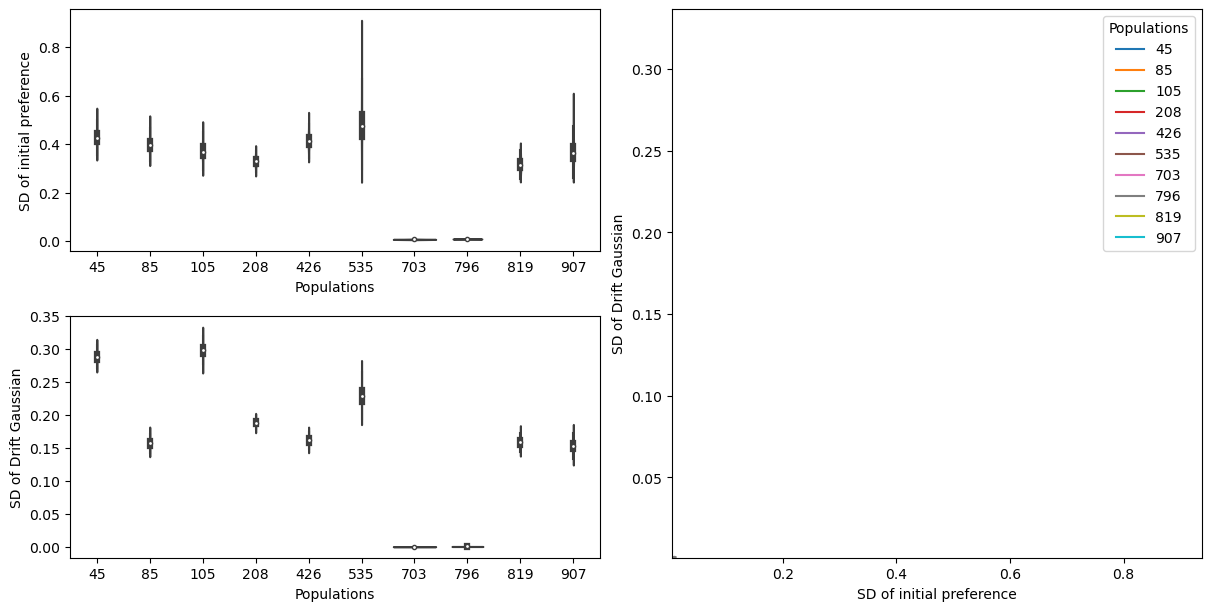

In [158]:
fig, fd = sh.plotResults(fit3, skt["LineNumber"].unique(), dropcolumns=[])

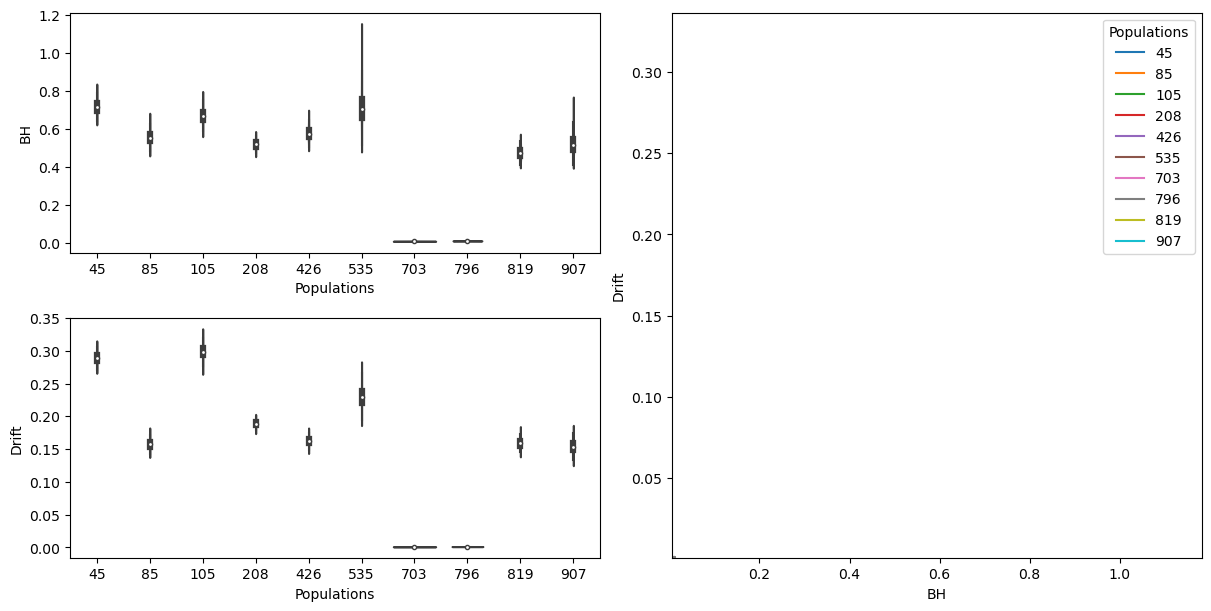

In [142]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3, skt["LineNumber"].unique(),  Des1="Drift", Des2="BH", check=False, var1="D", var2="BH", addvar1tovar2=True)


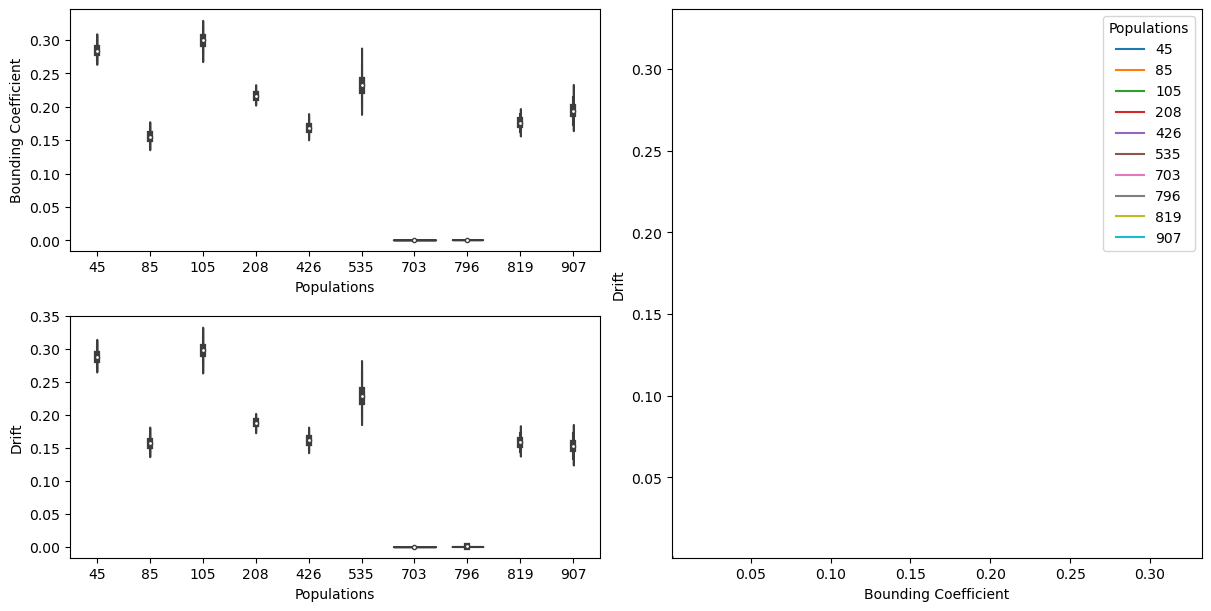

In [143]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3, skt["LineNumber"].unique(),  Des1="Drift", Des2="Bounding Coefficient", check=False, var1="D", var2="B")

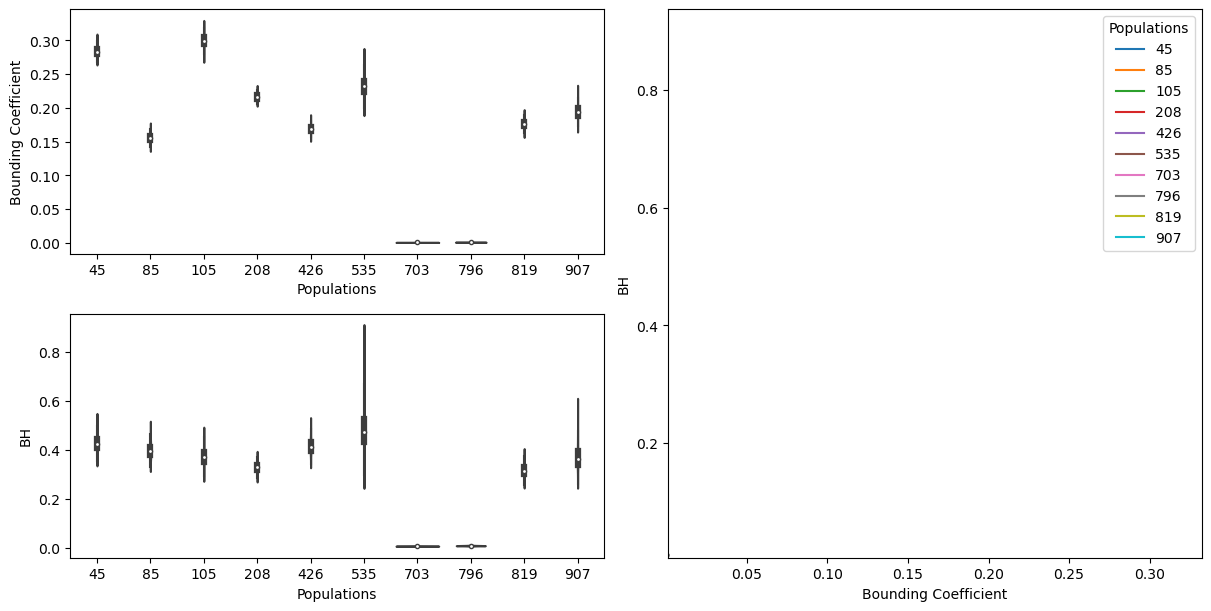

In [144]:
imp.reload(sh)
fig, fd = sh.plotResults(fit3, skt["LineNumber"].unique(),  Des1="BH", Des2="Bounding Coefficient", check=False, var1="BH", var2="B")

In [56]:
skt_unmelted_obs["LineNumber"].to_c

0         45
1         45
2         45
3         45
4         45
        ... 
10728    819
10729    819
10731    819
10732    819
10733    819
Name: LineNumber, Length: 5340, dtype: category
Categories (10, int64): [45, 85, 105, 208, ..., 703, 796, 819, 907]

In [53]:
lnc=pd.Categorical(skt_unmelted_obs["LineNumber"])
skt_unmelted_obs.loc[:,"LineNumber"]=lnc

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_66867/4269539089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skt_unmelted_obs.loc[:,"LineNumber"]=lnc
/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_66867/4269539089.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  skt_unmelted_obs.loc[:,"LineNumber"]=lnc


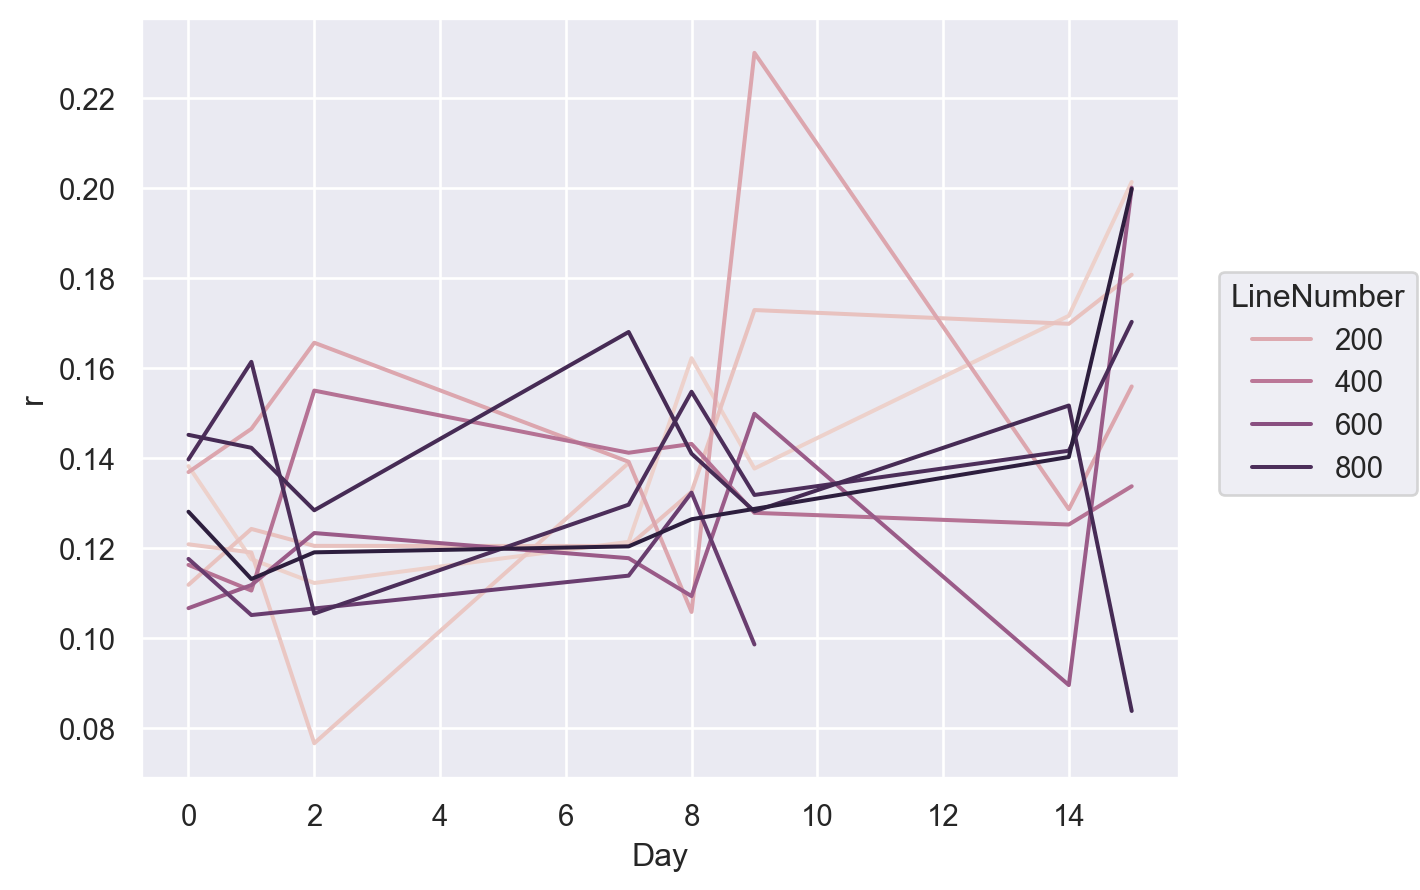

In [50]:
skt_unmelted_obs
import seaborn.objects as so
so.Plot(skt_unmelted_obs, x="Day", color="LineNumber", y="r").add(so.Line(), so.Agg('std'))

In [137]:
import scipy as sci

6.0 4.0
60.0 40.0
1.2 0.8


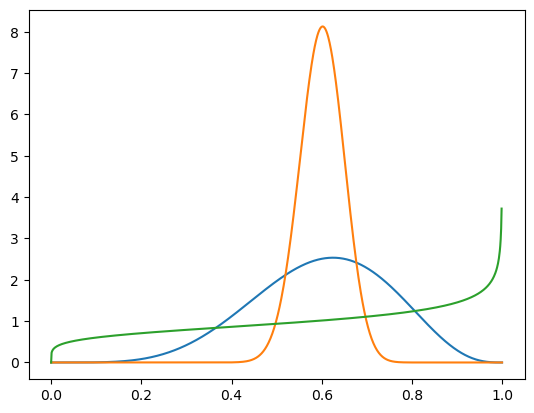

In [142]:
x=np.linspace(0,1, 1000)

mean=.6

u=10
print(mean*u, (1-mean)*u)

bpdf=sci.stats.beta(mean*u, (1-mean)*u).pdf(x)
plt.plot(x, bpdf)

u=100
print(mean*u, (1-mean)*u)

bpdf=sci.stats.beta(mean*u, (1-mean)*u).pdf(x)
plt.plot(x, bpdf)

u=2
print(mean*u, (1-mean)*u)

bpdf=sci.stats.beta(mean*u, (1-mean)*u).pdf(x)
plt.plot(x, bpdf)

1000 111.11111111111107 0.9
100 11.111111111111109 0.9
10 1.111111111111111 0.9


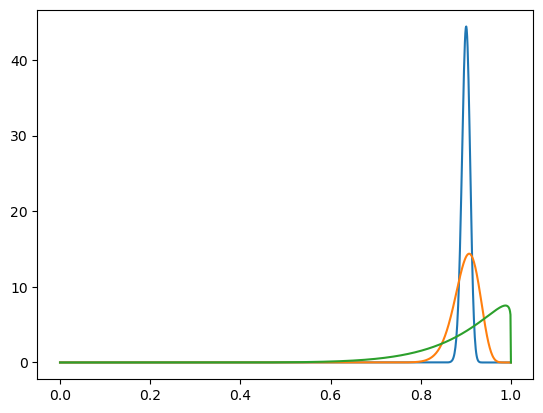

In [245]:
x=np.linspace(0,1, 1000)

mean=.9

a=1000
b=(1-mean)*a/mean
print(a, b, (a/(a+b)))

bpdf=sci.stats.beta(a,b).pdf(x)
plt.plot(x, bpdf)
a=100
b=(1-mean)*a/mean
print(a, b, (a/(a+b)))
cpdf=sci.stats.beta(a,b).pdf(x)
plt.plot(x, cpdf)
a=10
b=(1-mean)*a/mean
dpdf=sci.stats.beta(a,b).pdf(x)
print(a, b, (a/(a+b)))
plt.plot(x, dpdf)


# with both phi_u and phi_g

In [188]:
modelname="dmodel6_AR_singlephiandphig"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
phiug = CmdStanModel(stan_file=stan_file)


10:39:19 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephiandphig.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephiandphig
10:39:28 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephiandphig


In [189]:

dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0], #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}


In [190]:
fit_AR_phiug = phiug.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)


10:40:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:47:26 - cmdstanpy - INFO - CmdStan done processing.
10:47:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp91v9l9i5/tmpsvxlbtia.stan', line 81, column 10 to column 59)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp91v9l9i5/tmpsvxlbtia.stan', line 81, column 10 to column 59)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp91v9l9i5/tmpsvxlbtia.stan', line 76, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp91v9l9i5/tmpsvxlbtia.stan', line 81, column 10 to column 59)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp91v9l9i5

10:47:37 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 159 divergent transitions (15.9%)
	Chain 2 had 199 divergent transitions (19.9%)
	Chain 3 had 108 divergent transitions (10.8%)
	Chain 4 had 60 divergent transitions (6.0%)
	Use function "diagnose()" to see further information.


In [191]:

print(fit_AR_phiug.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephiandphigsnaz7epk/dmodel6_AR_singlephiandphig-20230510104013_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephiandphigsnaz7epk/dmodel6_AR_singlephiandphig-20230510104013_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephiandphigsnaz7epk/dmodel6_AR_singlephiandphig-20230510104013_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpecwhsw1q/dmodel6_AR_singlephiandphigsnaz7epk/dmodel6_AR_singlephiandphig-20230510104013_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
526 of 4000 (13.15%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameter

In [193]:
phiug_summary=fit_AR_phiug.summary()
phiug_summary

Mean       MCSE      StdDev            5%           50%  \
lp__       -1.551570e+06  20.313100  268.404000 -1.552000e+06 -1.551590e+06   
R_obs[1]   -7.781650e-02   0.004655    0.228302 -4.495790e-01 -8.091430e-02   
R_obs[2]   -7.410130e-01   0.001245    0.085578 -8.807070e-01 -7.407090e-01   
R_obs[3]    4.704530e-02   0.004566    0.281706 -4.111960e-01  4.324800e-02   
R_obs[4]   -5.407770e-01   0.001472    0.085094 -6.872720e-01 -5.393010e-01   
...                  ...        ...         ...           ...           ...   
R[1193,13]  6.264880e-03   0.009325    0.496007 -8.422070e-01  3.269670e-02   
R[1193,14] -2.644600e-03   0.009803    0.493790 -8.292030e-01  1.115750e-02   
R[1193,15] -8.594980e-04   0.010352    0.496257 -8.275240e-01 -8.721470e-04   
R[1193,16]  2.376140e-03   0.008611    0.484149 -7.909330e-01  8.684220e-03   
R[1193,17]  4.539370e-04   0.007868    0.467822 -7.677240e-01 -9.488890e-03   

                     95%     N_Eff   N_Eff/s     R_hat  
lp__       -1.551120e+06   174.593  0.168168  1.035820  
R_obs[1]    3.106620e-01  2405.120  2.316620  1.004150  
R_obs[2]   -6.019150e-01  4725.590  4.551690  0.999464  
R_obs[3]    5.124920e-01  3806.670  3.666580  1.001030  
R_obs[4]   -4.011000e-01  3341.290  3.218340  1.000730  
...                  ...       ...       ...       ...  
R[1193,13]  8.039490e-01  2829.040  2.724930  0.999554  
R[1193,14]  7.877720e-01  2537.050  2.443690  1.002320  
R[1193,15]  8.005320e-01  2297.960  2.213400  1.000720  
R[1193,16]  8.109880e-01  3161.010  3.044690  0.999874  
R[1193,17]  7.647030e-01  3535.180  3.405090  1.000890  

[40594 rows x 9 columns]

In [201]:
phiug_summary.loc["PHI_u", "Mean"]

0.14197

Text(0, 0.5, 'Phi Value')

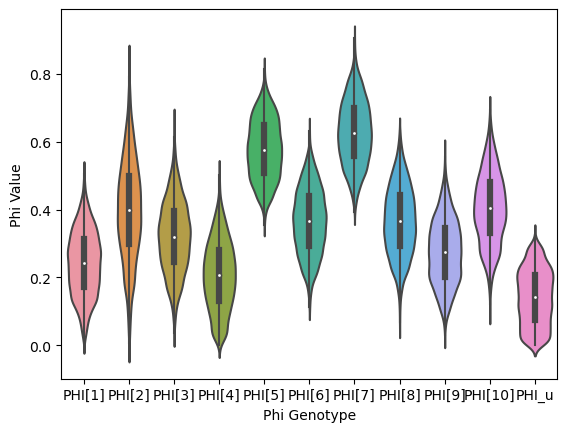

In [209]:
pihugpd=fit_AR_phiug.draws_pd()
phi_all=sns.violinplot(pihugpd.loc[:,"PHI[1]":"PHI_u"])
phi_all.set_xlabel("Phi Genotype")
phi_all.set_ylabel("Phi Value")

In [202]:
phiug_summary.loc["PHI[1]":"PHI_u", "Mean"]

PHI[1]     0.242961
PHI[2]     0.398546
PHI[3]     0.320376
PHI[4]     0.207012
PHI[5]     0.578467
PHI[6]     0.366082
PHI[7]     0.628083
PHI[8]     0.367332
PHI[9]     0.275811
PHI[10]    0.405059
PHI_u      0.141970
Name: Mean, dtype: float64

(<Figure size 1200x600 with 3 Axes>,
            lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
 0    -1551530.0       0.915191    0.049347          7.0         127.0   
 1    -1551240.0       0.996711    0.049347          7.0         127.0   
 2    -1551130.0       0.904293    0.049347          7.0         127.0   
 3    -1551470.0       0.903449    0.049347          7.0         127.0   
 4    -1551550.0       0.807466    0.049347          7.0         127.0   
 ...         ...            ...         ...          ...           ...   
 3995 -1551600.0       0.953399    0.034853          7.0         127.0   
 3996 -1551610.0       0.987186    0.034853          7.0         127.0   
 3997 -1551650.0       0.918036    0.034853          7.0         127.0   
 3998 -1551520.0       0.983176    0.034853          7.0         127.0   
 3999 -1551600.0       0.967935    0.034853          7.0         127.0   
 
       divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,

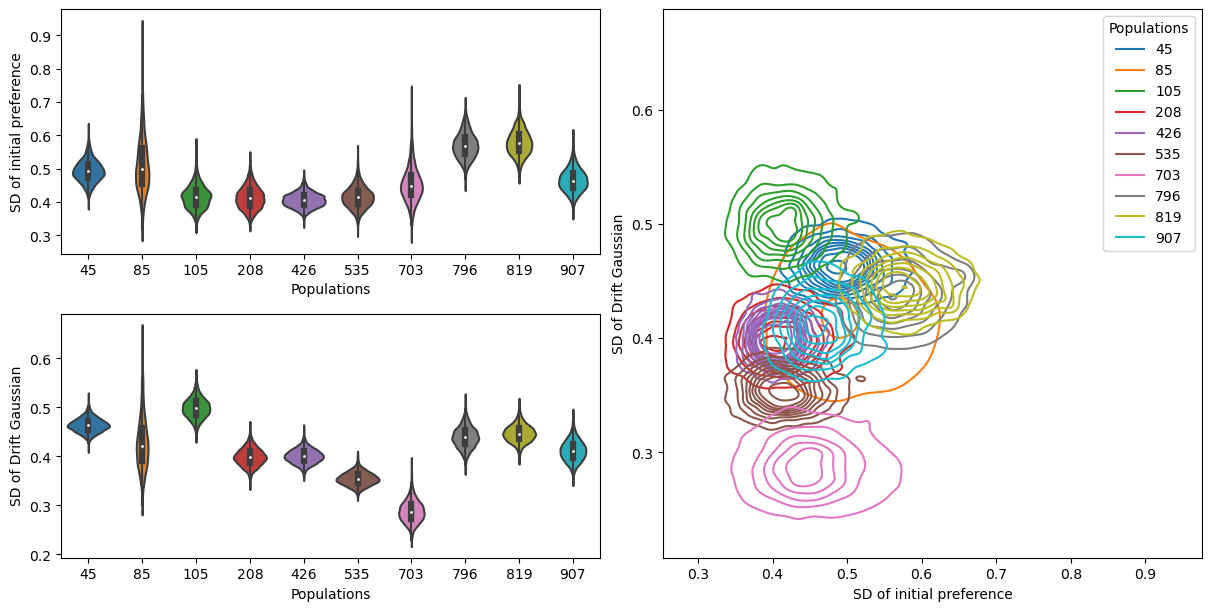

In [192]:
sh.plotResults(fit_AR_phiug, pd.Categorical(skt["LineNumber"]).categories)

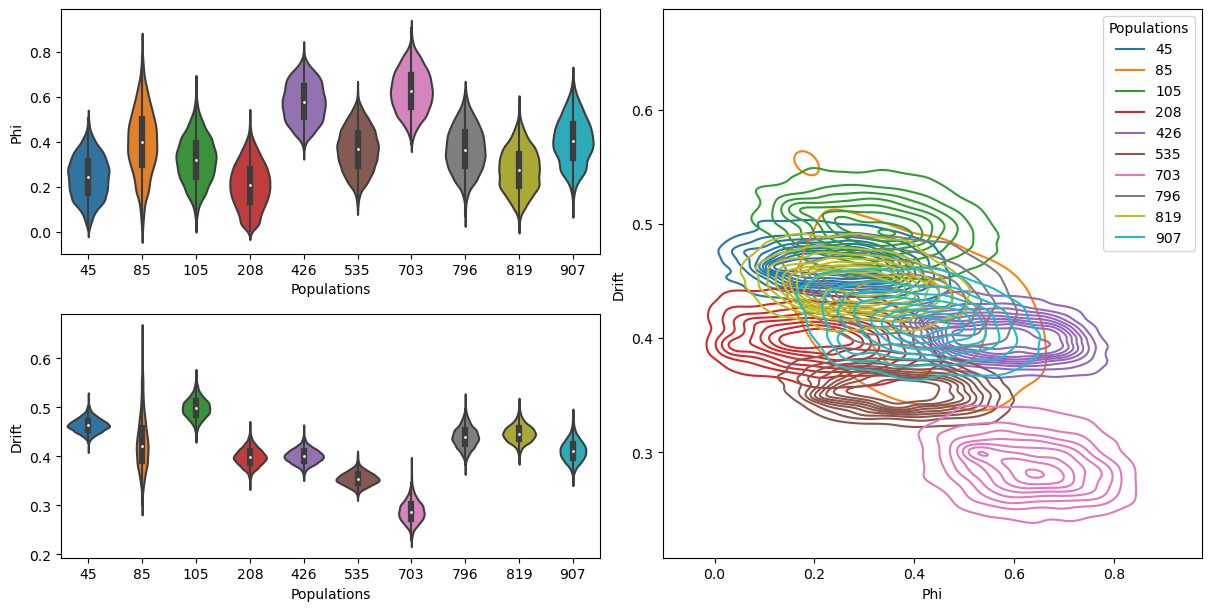

In [194]:
fig, fd= sh.plotResults(fit_AR_phiug, pd.Categorical(skt["LineNumber"]).categories, var1="D", var2="PHI", Des1="Drift", Des2="Phi")

# Beta Transform Version

In [10]:
modelname="dgrp_model_beta"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
model3 = CmdStanModel(stan_file=stan_file)

10:46:20 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model_beta.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model_beta
10:46:29 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model_beta


In [11]:

dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}
# fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
#   iter_sampling=1000)


In [12]:

fit3 = model3.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=1000)

10:46:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:53:14 - cmdstanpy - INFO - CmdStan done processing.
10:53:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: beta_lpdf: First shape parameter is inf, but must be positive finite! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpe3qsh6ct/tmp1aoq4_69.stan', line 64, column 10 to column 60)
	Exception: beta_lpdf: First shape parameter is inf, but must be positive finite! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpe3qsh6ct/tmp1aoq4_69.stan', line 64, column 10 to column 60)
	Exception: beta_lpdf: First shape parameter is 0, but must be positive finite! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpe3qsh6ct/tmp1aoq4_69.stan', line 61, column 8 to column 36)
	Exception: beta_lpdf: First shape parameter is 0, but must be positive finite! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpe3qsh6ct/tmp1aoq4_69.stan', line 64, column 10 to column 60)
Exception: beta_lpdf: First shape parameter is inf, but must be positive finite! (in 

(<Figure size 1200x600 with 3 Axes>,
            lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
 0    -1819180.0       0.808253    0.094636          6.0          63.0   
 1    -1819050.0       0.903675    0.094636          6.0          63.0   
 2    -1819080.0       0.889670    0.094636          6.0          63.0   
 3    -1819100.0       0.717991    0.094636          6.0          63.0   
 4    -1819180.0       0.790739    0.094636          6.0          63.0   
 ...         ...            ...         ...          ...           ...   
 3995 -1819410.0       0.982103    0.102332          5.0          31.0   
 3996 -1819470.0       0.995280    0.102332          5.0          31.0   
 3997 -1819490.0       0.954947    0.102332          5.0          31.0   
 3998 -1819380.0       0.927244    0.102332          5.0          31.0   
 3999 -1819450.0       0.918973    0.102332          5.0          31.0   
 
       divergent__   energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[1184,

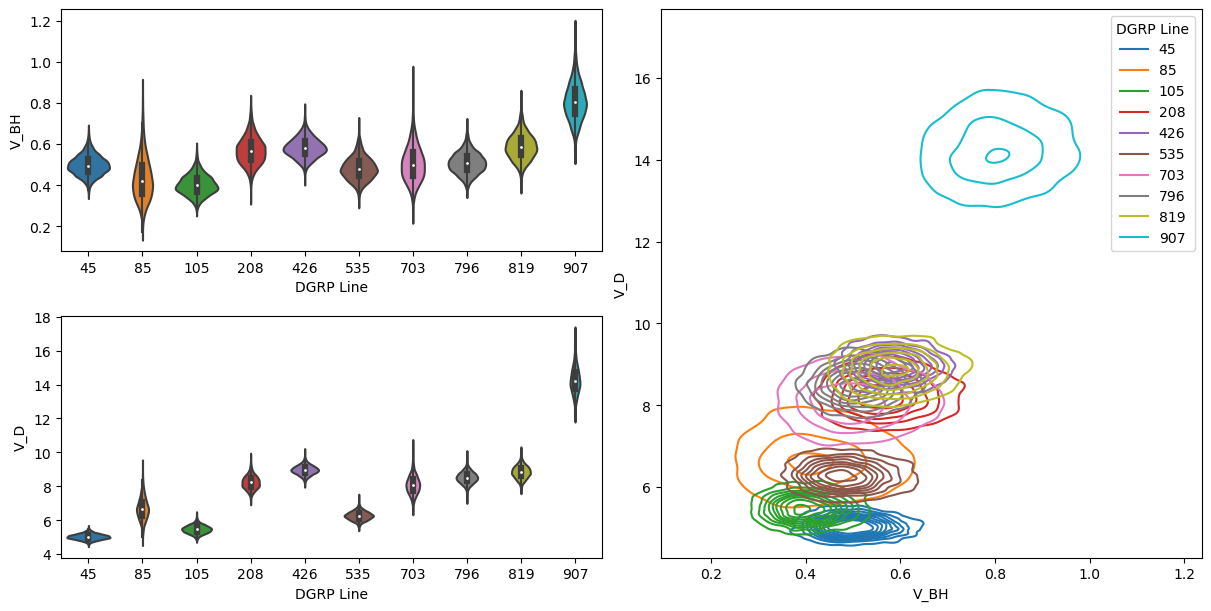

In [18]:
imp.reload(sh)
sh.plotResults(fit3, skt, BHdes="V_BH", Ddes="V_D", check=False)

In [81]:
fit3.summary()

Mean      MCSE      StdDev            5%           50%  \
lp__       -1.585250e+06  7.574790  185.616000 -1.585550e+06 -1.585250e+06   
R_obs[1]    1.771210e-01  0.001419    0.109292  2.328040e-02  1.661030e-01   
R_obs[2]    1.025230e-02  0.000129    0.010112  4.116930e-04  7.245490e-03   
R_obs[3]    2.603770e-01  0.001736    0.118607  6.929850e-02  2.558410e-01   
R_obs[4]    1.565510e-02  0.000187    0.014844  9.051000e-04  1.151460e-02   
...                  ...       ...         ...           ...           ...   
R[1193,13]  4.716970e-01  0.001968    0.119593  2.727180e-01  4.719150e-01   
R[1193,14]  4.843470e-01  0.001967    0.120428  2.904230e-01  4.855800e-01   
R[1193,15]  4.919400e-01  0.001991    0.119295  2.981000e-01  4.913500e-01   
R[1193,16]  4.980320e-01  0.001999    0.123264  2.969910e-01  4.971820e-01   
R[1193,17]  4.954600e-01  0.002137    0.144500  2.618820e-01  4.954180e-01   

                     95%    N_Eff   N_Eff/s     R_hat  
lp__       -1.584940e+06   600.47   1.07609  1.003530  
R_obs[1]    3.775050e-01  5929.43  10.62600  0.999659  
R_obs[2]    3.033180e-02  6177.44  11.07050  0.999903  
R_obs[3]    4.674020e-01  4669.49   8.36813  0.999359  
R_obs[4]    4.577690e-02  6295.25  11.28160  0.999404  
...                  ...      ...       ...       ...  
R[1193,13]  6.636680e-01  3694.65   6.62113  1.000400  
R[1193,14]  6.838940e-01  3750.23   6.72073  0.999601  
R[1193,15]  6.855460e-01  3590.12   6.43381  1.000940  
R[1193,16]  7.013490e-01  3802.26   6.81398  0.999475  
R[1193,17]  7.336590e-01  4570.50   8.19073  0.999724  

[40587 rows x 9 columns]

In [118]:
fit3.to

AttributeError: 'numpy.ndarray' object has no attribute 'summary'

In [133]:
# x.loc["BH[0]",:]

In [91]:
x.index

Index(['lp__', 'R_obs[1]', 'R_obs[2]', 'R_obs[3]', 'R_obs[4]', 'R_obs[5]',
       'R_obs[6]', 'R_obs[7]', 'R_obs[8]', 'R_obs[9]',
       ...
       'R[1193,8]', 'R[1193,9]', 'R[1193,10]', 'R[1193,11]', 'R[1193,12]',
       'R[1193,13]', 'R[1193,14]', 'R[1193,15]', 'R[1193,16]', 'R[1193,17]'],
      dtype='object', length=40587)

In [95]:
xdf=pd.DataFrame(x.index)

In [96]:
xdf

0
0            lp__
1        R_obs[1]
2        R_obs[2]
3        R_obs[3]
4        R_obs[4]
...           ...
40582  R[1193,13]
40583  R[1193,14]
40584  R[1193,15]
40585  R[1193,16]
40586  R[1193,17]

[40587 rows x 1 columns]

In [109]:
xdf[3000:5100]

0
3000  R_obs[3000]
3001  R_obs[3001]
3002  R_obs[3002]
3003  R_obs[3003]
3004  R_obs[3004]
...           ...
5095  R_obs[5095]
5096  R_obs[5096]
5097  R_obs[5097]
5098  R_obs[5098]
5099  R_obs[5099]

[2100 rows x 1 columns]

In [132]:
# fit3.draws_pd().loc[:,"D[0]"]

In [126]:
fit3.D.mean(axis=1)

array([0.18092175, 0.18410453, 0.17503963, ..., 0.18008902, 0.18593185,
       0.20882047])

In [127]:
fit3.B.mean(axis=0)

array([0.2259035 , 0.38339042, 0.29938675, ..., 0.35429767, 0.22929692,
       0.35710983])

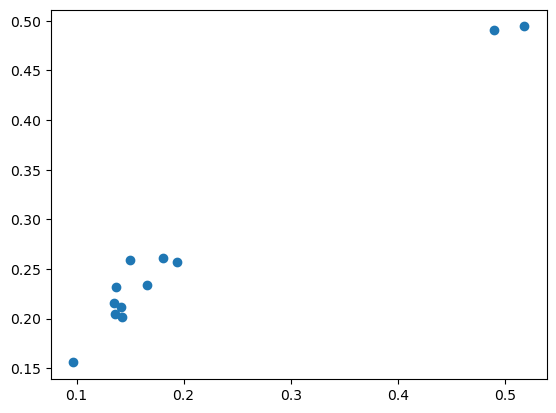

In [135]:
plt.scatter(fit3.D.mean(axis=0), fit3.B.mean(axis=0))

In [ ]:
# 